# Using Tabula Sapiens as a reference for annotating new datasets

In [2]:
import os, sys

#sys.path.insert(0, '../../PopV')
import popv
import anndata
import numpy as np
import scanpy as sc
from scanpy.plotting import palettes
sys.path.insert(-1, '../..')
import _utils

2024-02-13 11:59:15.542958: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-13 11:59:15.576429: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-13 11:59:16.107731: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
From /home/cane/miniconda3/envs/popv_bench/lib/python3.9/site-packages/tensorflow/python/compat/v2_compat.py:107: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for upda

In [3]:
popv.__file__

'/home/cane/miniconda3/envs/popv_bench/lib/python3.9/site-packages/popv/__init__.py'

# Step 2: Load your data (User Action Required)
Here we provide three options to load your data:
1. Connect to Google Drive (highly recommended)
2. Download your data from the cloud and save into this session or on Google drive.
3. Upload your data manually into this session (files are not persistent and will be deleted when session is closed)

As an example, we use a subsampled version of the [Lung Cell Atlas](https://hlca.ds.czbiohub.org/) \[1] for our query data.

\[1] Travaglini, K. et al. A molecular cell atlas of the human lung from single-cell RNA sequencing. *Nature* **587**, 619–625(2020).

In [64]:
from scvi.data import cellxgene

adata_url = "https://cellxgene.cziscience.com/e/9f222629-9e39-47d0-b83f-e08d610c7479.cxg/"
adata = cellxgene(adata_url, filename="hlca_extended.h5ad", save_path=".")

KeyboardInterrupt: 

In [ ]:
import pandas as pd

pd.options.display.max_columns = None

In [ ]:
adata.obs['study'].value_counts()

Kaminski_2020             307650
Banovich_Kropski_2020     204586
Meyer_2021                129340
Meyer_Nikolic_2022        119634
Regev_2021                 96060
Thienpont_2018             93575
Budinger_2020              91980
Sheppard_2020              80020
Misharin_Budinger_2018     78317
Wunderink_2021             77146
Barbry_Leroy_2020          74487
Nawijn_2021                70402
Lambrechts_2021            65166
Misharin_2021              64843
Zhang_2021                 62469
Krasnow_2020               60982
Duong_lungMAP_unpubl       53904
Janssen_2020               49384
Sun_2020                   46500
Jain_Misharin_2021         45557
Gomperts_2021              40709
Eils_2020                  39778
Schiller_2020              38648
Shalek_2018                36740
Schiller_2021              35984
Meyer_2019                 35554
Seibold_2020               33593
Peer_Massague_2020         32850
Lafyatis_2019              27297
Lafyatis_Rojas_2019        24181
Tata_unpub

In [ ]:
adata.var

feature_is_filtered original_gene_symbols feature_name  \
ensembl_id                                                                
ENSG00000121410                False                  A1BG         A1BG   
ENSG00000268895                False              A1BG-AS1     A1BG-AS1   
ENSG00000148584                False                  A1CF         A1CF   
ENSG00000175899                False                   A2M          A2M   
ENSG00000245105                False               A2M-AS1      A2M-AS1   
...                              ...                   ...          ...   
ENSG00000174903                False                 RAB1B        RAB1B   
ENSG00000159167                False                  STC1         STC1   
ENSG00000136854                False                STXBP1       STXBP1   
ENSG00000135605                False                   TEC          TEC   
ENSG00000109501                False                  WFS1         WFS1   

                feature_reference feature_biotype  
ensembl_id                                         
ENSG00000121410    NCBITaxon:9606            gene  
ENSG00000268895    NCBITaxon:9606            gene  
ENSG00000148584    NCBITaxon:9606            gene  
ENSG00000175899    NCBITaxon:9606            gene  
ENSG00000245105    NCBITaxon:9606            gene  
...                           ...             ...  
ENSG00000174903    NCBITaxon:9606            gene  
ENSG00000159167    NCBITaxon:9606            gene  
ENSG00000136854    NCBITaxon:9606            gene  
ENSG00000135605    NCBITaxon:9606            gene  
ENSG00000109501    NCBITaxon:9606            gene  

[56295 rows x 5 columns]

In [ ]:
query_adata = adata[adata.obs['study'] == 'Sun_2020'].copy()
query_adata.obs_names_make_unique()
query_adata.var_names = query_adata.var_names.str.upper()
# query_adata = query_adata[query_adata.obs['cell_type']!='native cell'].copy()
# query_adata = query_adata[np.random.choice(query_adata.obs_names, 1000, replace=False)]

In [ ]:
query_adata.var_names = query_adata.var['original_gene_symbols'].values

In [ ]:
query_adata.X

<46500x56295 sparse matrix of type '<class 'numpy.float32'>'
	with 73271420 stored elements in Compressed Sparse Row format>

In [ ]:
query_adata.raw.X

<46500x56295 sparse matrix of type '<class 'numpy.float32'>'
	with 73271420 stored elements in Compressed Sparse Row format>

In [ ]:
query_adata.X.data = query_adata.raw.X.data

In [ ]:
del query_adata.uns
del query_adata.var
del query_adata.raw
query_adata.write('sub_nucleus.h5ad')

# Step 3 (User Action Required): Setting Up Annotation Parameters 

Here is where you set the parameters for the automated annotation.

Arguments:
- **tissue:** Tabula Sapiens tissue to annotate your data with. Available tissues: ["Bladder", "Blood", "Bone_Marrow", "Kidney", "Large_Intestine", "Lung","Lymph_Node", "Pancreas", "Small_Intestine", "Spleen", "Thymus","Trachea", "Vasculature"]
- **save_location:** location to save results to. By default will save to a folder named `annotation_results`. It is highly recommended you provide a Google Drive folder here.
- **query_batch_key:** key in `query_adata.obs` for batch correction. Set to None for no batch correction. 
- **algorithms:** these are the methods to run. By default, will run all methods.
Options: ["knn_on_scvi_pred", "scanvi_pred", "knn_on_bbknn_pred", "svm_pred", "rf_pred", "onclass_pred", "knn_on_scanorama_pred",


Lesser used parameters
- **query_labels_key**: scANVI has the option to use labeled cells in the query dataset during training. To use some prelabeled cells from the query dataset, set `query_labels_key` to the corresponding key in `query_adata.obs`
- **unknown_celltype_label**: If `query_labels_key` is not None, will treat everything not labeled `unknown_celltype_label` as a labeled cell

In [ ]:
""" 
tissue options: 
['Bladder','Blood','Bone_Marrow','Fat',
'Heart','Kidney','Large_Intestine','Liver',
'Lung','Lymph_Node','Mammary','Muscle',
'Pancreas','Prostate','Salivary Gland',
'Skin','Small_Intestine','Spleen',
'Thymus','Trachea','Vasculature']
"""
output_folder = 'annotation_nucleus'
tissue = 'Lung'
save_folder = f'{output_folder}/popv_results'

query_batch_key = 'donor_id'

# Lesser used parameters
query_labels_key=None
unknown_celltype_label='unknown'

# Step 4: Downloading Reference Data and Pretrained Models
No more user input required! Just run all the following code blocks.

**NOTE: PopV has only been evaluated with the Lung/Thymus/Lymph_Node as a reference dataset. Different tissues have different annotation quality and the Tabula sapiens community is currently actively improving the annotation quality. We strongly expect improvement of cell annotation when the updated annotation is released. Upon release the Zenodo repository will be updated.**

In [ ]:
import requests
res = requests.get("https://zenodo.org/api/records/7587774")
tissue_download_path = {ind['key'][3:-14]:ind['links']['self'] for ind in res.json()['files']}

In [ ]:
refdata_url = tissue_download_path[tissue]
output_fn = f'{output_folder}/TS_{tissue}.h5ad'
if not os.path.exists(output_fn):
    !wget -O $output_fn $refdata_url

In [ ]:
output_fn = f'{output_folder}/TS_{tissue}.h5ad'
# read in the reference dataset
ref_adata = sc.read_h5ad(output_fn)
# ref_adata = ref_adata[np.random.choice(ref_adata.obs_names, 5000, replace=False)]

In [ ]:
ref_adata.obs['cell_ontology_class'] = ref_adata.obs['cell_ontology_class'].astype(str)
ref_adata.obs.loc[ref_adata.obs['free_annotation']=='capillary aerocyte', 'cell_ontology_class'] = 'alveolar capillary type 2 endothelial cell'
ref_adata.obs['cell_ontology_class'] = ref_adata.obs['cell_ontology_class'].astype('category')

### Setup reference data

In [ ]:
# Following parameters are specific to Tabula Sapiens dataset and contain the annotated cell-type and the batch_key that are corrected for during model training.
ref_labels_key='cell_ontology_class'
ref_batch_key = 'donor_assay'

In [ ]:
min_celltype_size = np.min(ref_adata.obs.groupby(ref_labels_key).size())
n_samples_per_label = np.max((min_celltype_size, 500))

### Preprocess query with ref dataset


In [ ]:
pd.options.display.max_rows = 200

In [ ]:
del query_adata.layers

In [ ]:
from popv.preprocessing import Process_Query

adata = Process_Query(
        query_adata,
        ref_adata,
        query_labels_key=query_labels_key,
        query_batch_key=query_batch_key,
        ref_labels_key=ref_labels_key,
        ref_batch_key=ref_batch_key,
        cl_obo_folder='../../PopV/ontology/',
        unknown_celltype_label=unknown_celltype_label,
        save_path_trained_models=f'{output_folder}/pretrained_models/',
        prediction_mode='retrain', # 'fast' mode gives fast results (does not include BBKNN and Scanorama and makes more inaccurate errors)
        n_samples_per_label=n_samples_per_label,
        use_gpu=True,
        compute_embedding=True,
        hvg=4000
    ).adata

Sampling 500 per label


In [ ]:
adata

AnnData object with n_obs × n_vars = 82172 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'suspension_type', 'is_primary_data', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_an

# Step 5: Run Automated Cell Annotation Methods
No user action required. 

Your results will be saved to the folder you provided as **save_folder**.

All results are stored in adata.obs
- The column `popv_prediction` contains the end popv prediction. 
- `popv_prediction_score` contains the score for the popv_prediction, which is a measure of the number of methods that agreed with the resulting prediction. We use the cell ontology when aggregating results.
- We also include the majority vote, which simply takes the celltype that was most often predicted by the individual methods.

In [ ]:
from popv.annotation import annotate_data
annotate_data(adata, save_path=f'{output_folder}/popv_output_nucleus')

Saving celltypist results to adata.obs["popv_celltypist_prediction"]
🍳 Preparing data before training
✂️ 17 non-expressed genes are filtered out
🔬 Input data has 10461 cells and 3983 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression


✅ Model training done!
🔬 Input data has 82172 cells and 4000 genes
🔗 Matching reference genes in the model
🧬 3983 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
/home/cane/miniconda3/envs/popv_bench/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/cane/miniconda3/envs/popv_bench/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is c

Found 4000 genes among all datasets
[[0.00000000e+00 1.80689655e-01 2.32220610e-02 2.30574713e-01
  3.44062153e-02 0.00000000e+00 0.00000000e+00 6.18301731e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.57474601e-01 3.00087083e-01
  1.64261931e-01 4.02414487e-04 1.01191815e-03 2.06100577e-04
  1.69405387e-04 2.54129606e-04 0.00000000e+00 3.82714081e-03
  0.00000000e+00 2.13675214e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.58200290e-01
  4.48390677e-01 1.45137881e-02 1.88679245e-02 4.35413643e-02
  5.80551524e-03 2.90275762e-03 1.45137881e-03 2.17706821e-02
  0.00000000e+00 2.90275762e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.76026637e-01 6.03621730e-03 7.14078374e-03 9.89282770e-03
  1.69405387e-04 0.00000000e+00 0.00000000e+00 4.62446181e-03
  0.00000000e+00 1.85776488e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.1065482

Saving knn on scanorama results to adata.obs["popv_knn_on_scanorama_prediction"]
Saving UMAP of scanorama results to adata.obs["X_umap_scanorma_popv"]
Integrating data with scvi
Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
Training scvi offline.
INFO: GPU available: True (cuda), used: True
GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
INFO: IPU a

Epoch 49/49: 100%|██████████| 49/49 [02:57<00:00,  3.54s/it, v_num=1, train_loss_step=1.09e+3, train_loss_epoch=1.13e+3]

INFO: `Trainer.fit` stopped: `max_epochs=49` reached.
`Trainer.fit` stopped: `max_epochs=49` reached.


Epoch 49/49: 100%|██████████| 49/49 [02:57<00:00,  3.63s/it, v_num=1, train_loss_step=1.09e+3, train_loss_epoch=1.13e+3]


Saving knn on scvi results to adata.obs["popv_knn_on_scvi_prediction"]
Saving UMAP of scvi results to adata.obs["X_scvi_umap_popv"]
Computing Onclass. Storing prediction in adata.obs["popv_onclass_prediction"]
2024-01-02 15:10:44.930760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-02 15:10:44.951957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-02 15:10:44.952124: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successfu

Training cost after epoch 1: loss:4.958594 acc: 0.963 auc: 1.000 auprc: 0.977
Training cost after epoch 2: loss:2.216563 acc: 0.984 auc: 1.000 auprc: 0.997
Training cost after epoch 3: loss:1.450951 acc: 0.991 auc: 1.000 auprc: 1.000
Training cost after epoch 4: loss:1.035500 acc: 0.994 auc: 1.000 auprc: 1.000
Training cost after epoch 5: loss:0.759779 acc: 0.996 auc: 1.000 auprc: 1.000
Training cost after epoch 6: loss:0.569219 acc: 0.997 auc: 1.000 auprc: 1.000
Training cost after epoch 7: loss:0.436317 acc: 0.998 auc: 1.000 auprc: 1.000
Training cost after epoch 8: loss:0.341455 acc: 0.998 auc: 1.000 auprc: 1.000
Training cost after epoch 9: loss:0.279035 acc: 0.998 auc: 1.000 auprc: 1.000
Training cost after epoch 10: loss:0.239233 acc: 0.997 auc: 1.000 auprc: 1.000
Training cost after epoch 11: loss:0.207426 acc: 0.995 auc: 1.000 auprc: 1.000
Training cost after epoch 12: loss:0.182550 acc: 0.999 auc: 1.000 auprc: 1.000
Training cost after epoch 13: loss:0.165905 acc: 0.994 auc: 1

Computing random forest classifier. Storing prediction in adata.obs["popv_rf_prediction"]
Integrating data with scANVI


INFO     File annotation_nucleus/pretrained_models//scvi/model.pt already downloaded                               
INFO     Training for 20 epochs.                                                                                   


INFO: GPU available: True (cuda), used: True
GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 20/20: 100%|██████████| 20/20 [01:02<00:00,  3.76s/it, v_num=1, train_loss_step=1.38e+3, train_loss_epoch=1.26e+3]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [01:02<00:00,  3.15s/it, v_num=1, train_loss_step=1.38e+3, train_loss_epoch=1.26e+3]

Saving scanvi label prediction to adata.obs["popv_scanvi_prediction"]


Saving UMAP of scanvi results to adata.obs["X_scanvi_umap_popv"]
Computing support vector machine. Storing prediction in adata.obs["popv_svm_prediction"]
Using predictions ['popv_celltypist_prediction', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scvi_prediction', 'popv_onclass_prediction', 'popv_rf_prediction', 'popv_scanvi_prediction', 'popv_svm_prediction'] for PopV consensus
Predictions saved to annotation_nucleus/popv_output_nucleus/predictions.csv


In [ ]:
# Optional: save the full anndata will all objects
adata.write(f'{output_folder}/query_and_reference_popv.h5ad')

... storing 'donor_id' as categorical
... storing 'cell_type_ontology_term_id' as categorical
... storing 'cell_type' as categorical
... storing 'assay' as categorical
... storing '_batch_annotation' as categorical
... storing '_labels_annotation' as categorical
... storing 'popv_knn_on_bbknn_prediction' as categorical
... storing 'popv_knn_on_scanorama_prediction' as categorical
... storing 'popv_knn_on_scvi_prediction' as categorical
... storing '_labels_annotation_cell_ontology_id' as categorical
... storing 'popv_onclass_prediction' as categorical
... storing 'popv_onclass_seen' as categorical
... storing 'popv_rf_prediction' as categorical
... storing 'popv_scanvi_prediction' as categorical
... storing 'popv_svm_prediction' as categorical
... storing 'popv_majority_vote_prediction' as categorical
... storing 'popv_prediction' as categorical
... storing 'popv_parent' as categorical


# Downstream analysis

In [4]:
output_folder = 'annotation_nucleus'

In [5]:
# Optional: save the full anndata will all objects
adata = sc.read(f'{output_folder}/query_and_reference_popv.h5ad')

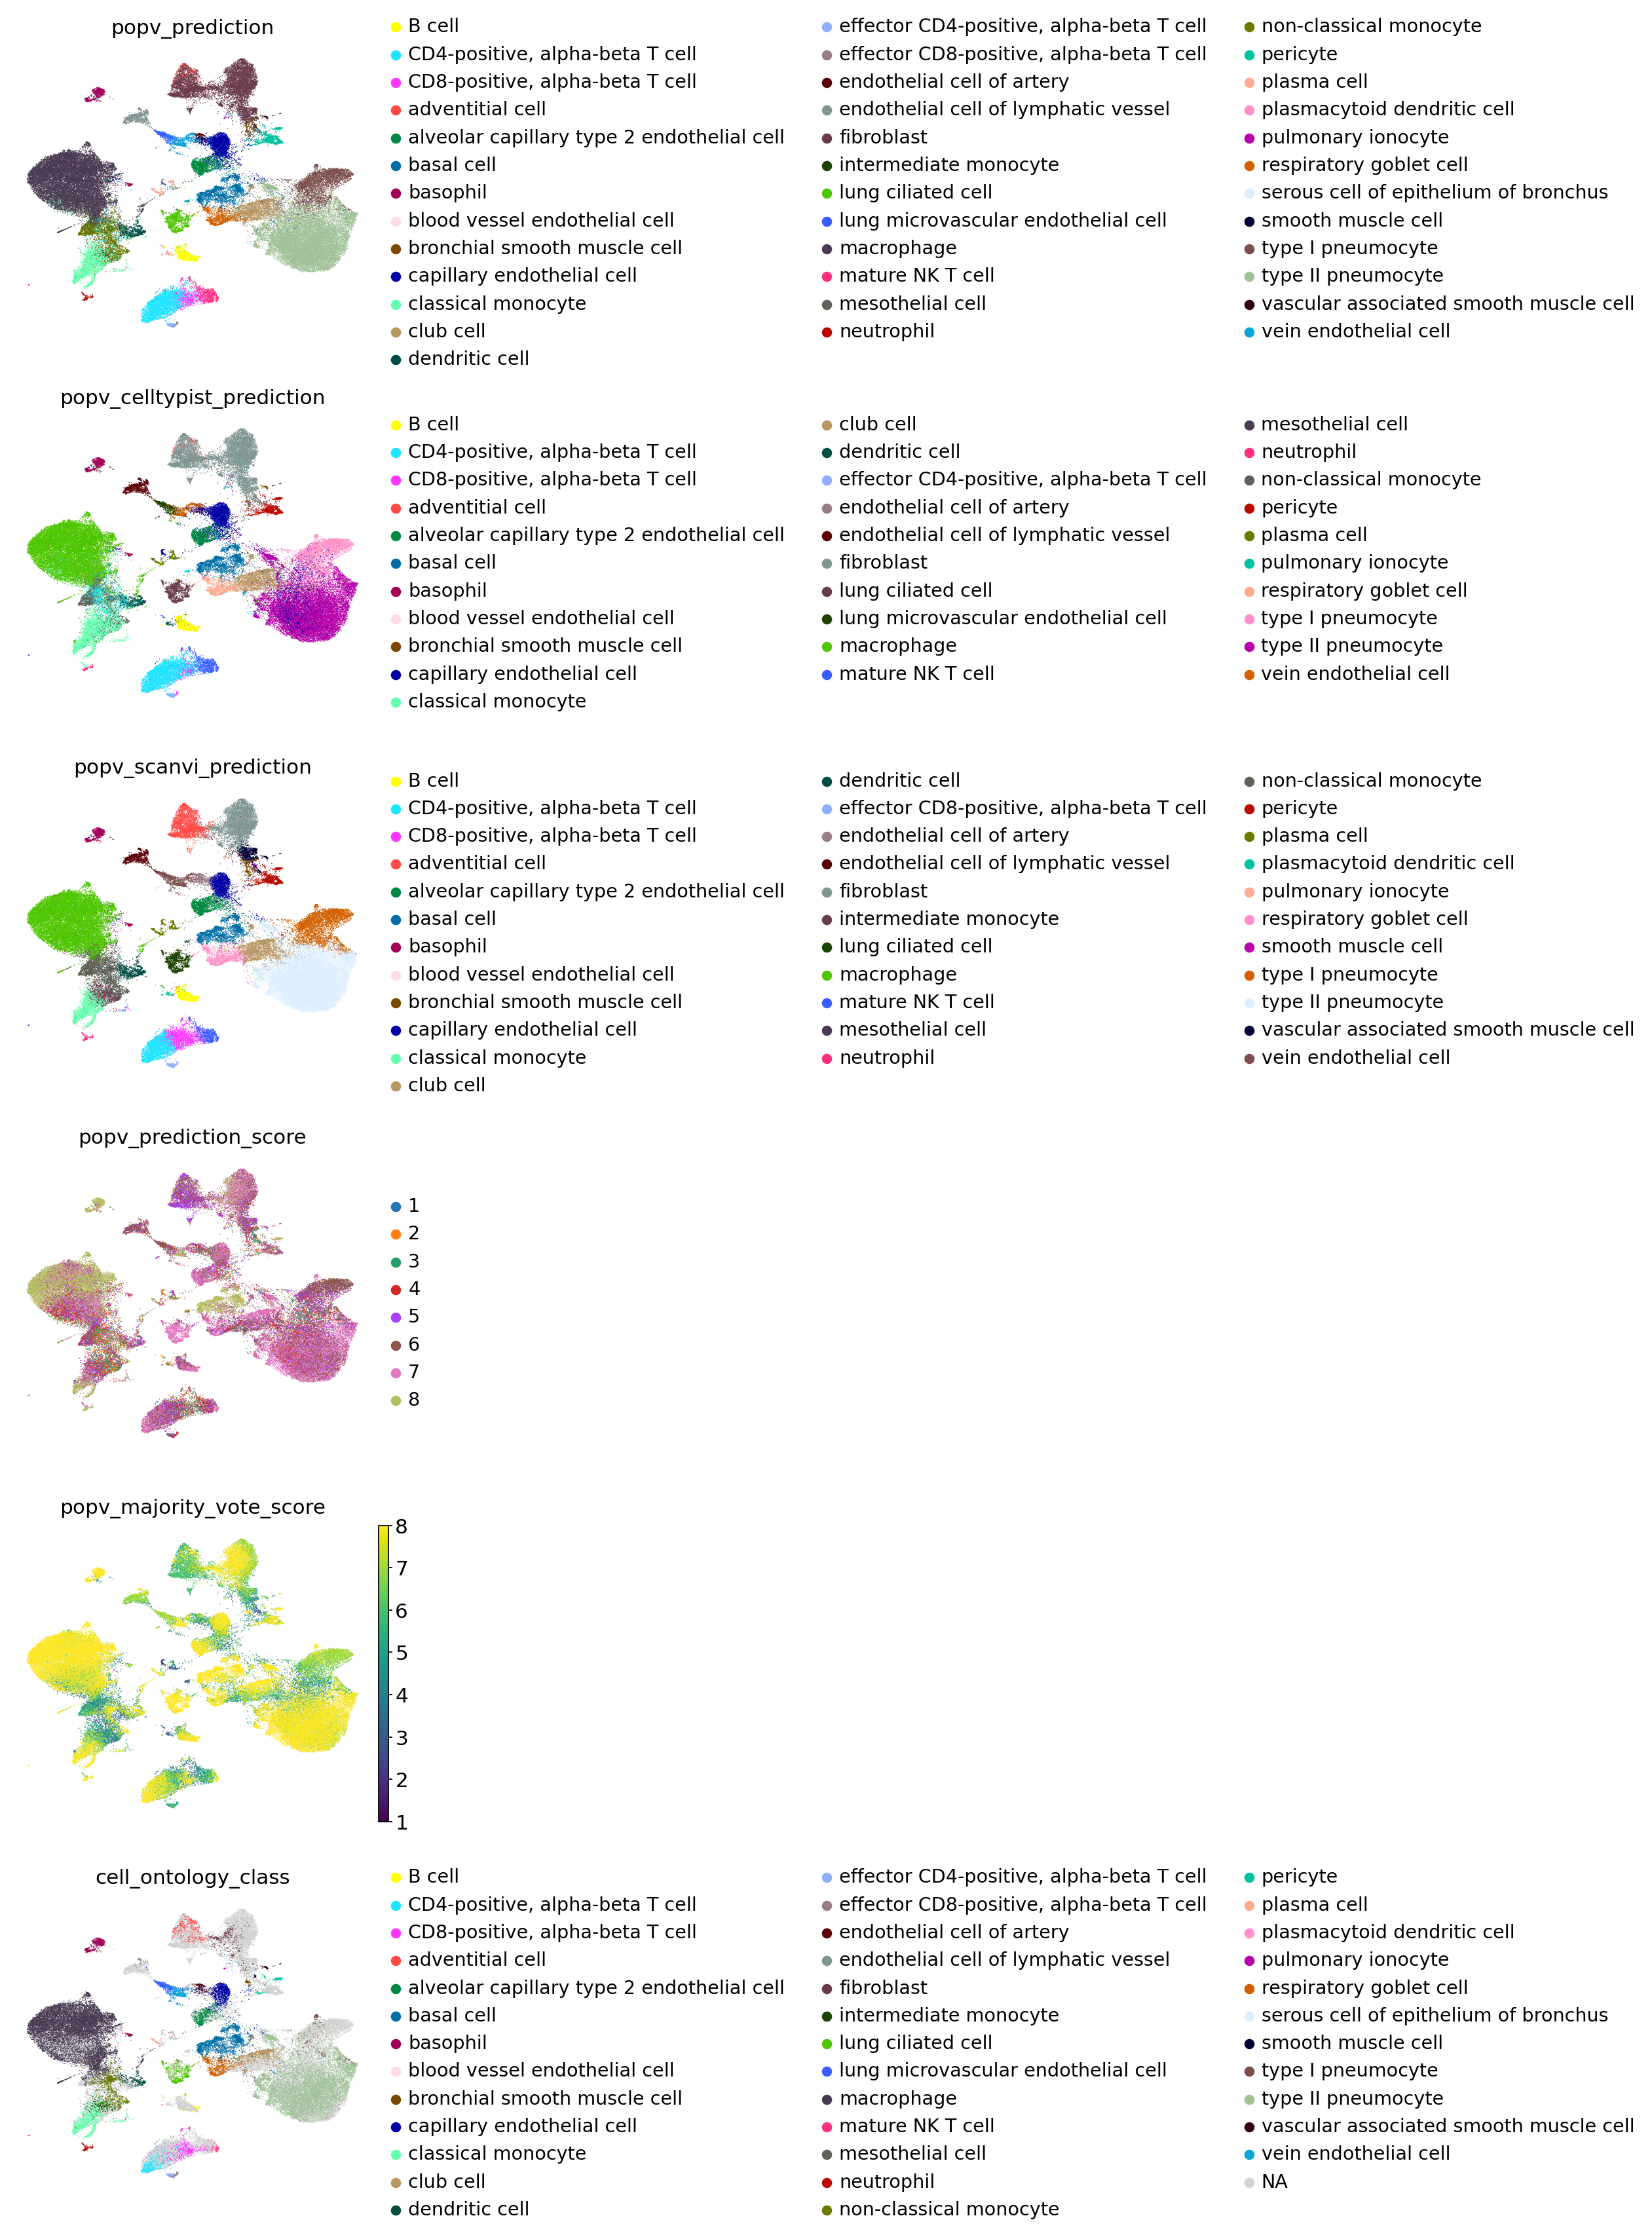

In [ ]:
adata.obsm['X_umap'] = adata.obsm['X_scanvi_umap_popv']

sc.pl.umap(adata,
           color=['popv_prediction', 'popv_celltypist_prediction', 'popv_scanvi_prediction', 'popv_prediction_score', 'popv_majority_vote_score', 'cell_ontology_class'], ncols=1)

In [17]:
def most_common(group):
    return group.mode().iloc[0]

def conditional_mode(group):
    mode_value = group.mode()
    if not mode_value.empty and (group == mode_value.iloc[0]).sum() / len(group) > 0.8:
        return mode_value.iloc[0]
    else:
        return None  # or pd.NA, depending on how you want to handle the absence of a valid mode


mapping = dict(query_adata.obs[['popv_prediction', 'original_ann_nonharmonized']].groupby('original_ann_nonharmonized')['popv_prediction'].apply(most_common))

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt

In [20]:
mapping['Interstitial macrophages'] = 'macrophage'
mapping['T cells'] = 'T cell'
mapping['airway smooth muscle'] = 'smooth muscle cell'
mapping['arteries'] = 'endothelial cell of artery'
mapping['bronchial vessel'] = 'blood vessel endothelial cell'
mapping['enucleated erythrocytes'] = 'unclassified'
mapping['unclassified'] = 'unclassified'
mapping['pulmonary neuroendocrine cells'] = 'unclassified'


celltypes_mapping = pd.DataFrame.from_dict(mapping, orient='index')
celltypes_mapping['cell_counts'] = query_adata.obs['original_ann_nonharmonized'].value_counts()[celltypes_mapping.index]

print(celltypes_mapping.to_latex(index=True))

\begin{tabular}{llr}
\toprule
{} &                                           0 &  cell\_counts \\
\midrule
AT1/AT2-like                   &                          type II pneumocyte &          794 \\
AT2/Club-like                  &                                   club cell &          425 \\
Alveolar macrophages           &                                  macrophage &         7620 \\
B cells                        &                                      B cell &         1034 \\
Cap1                           &                  capillary endothelial cell &         1080 \\
Cap2                           &  alveolar capillary type 2 endothelial cell &          800 \\
Interstitial macrophages       &                                  macrophage &         1148 \\
NK cells                       &                            mature NK T cell &         1071 \\
T cells                        &                                      T cell &         3100 \\
airway smooth muscle           &      

In [22]:
adata.obs['harmonized_celltype'] = [mapping[celltype] if not pd.isna(celltype) else None for celltype in adata.obs['original_ann_nonharmonized']]
query_adata = adata[adata.obs['_dataset']=='query']

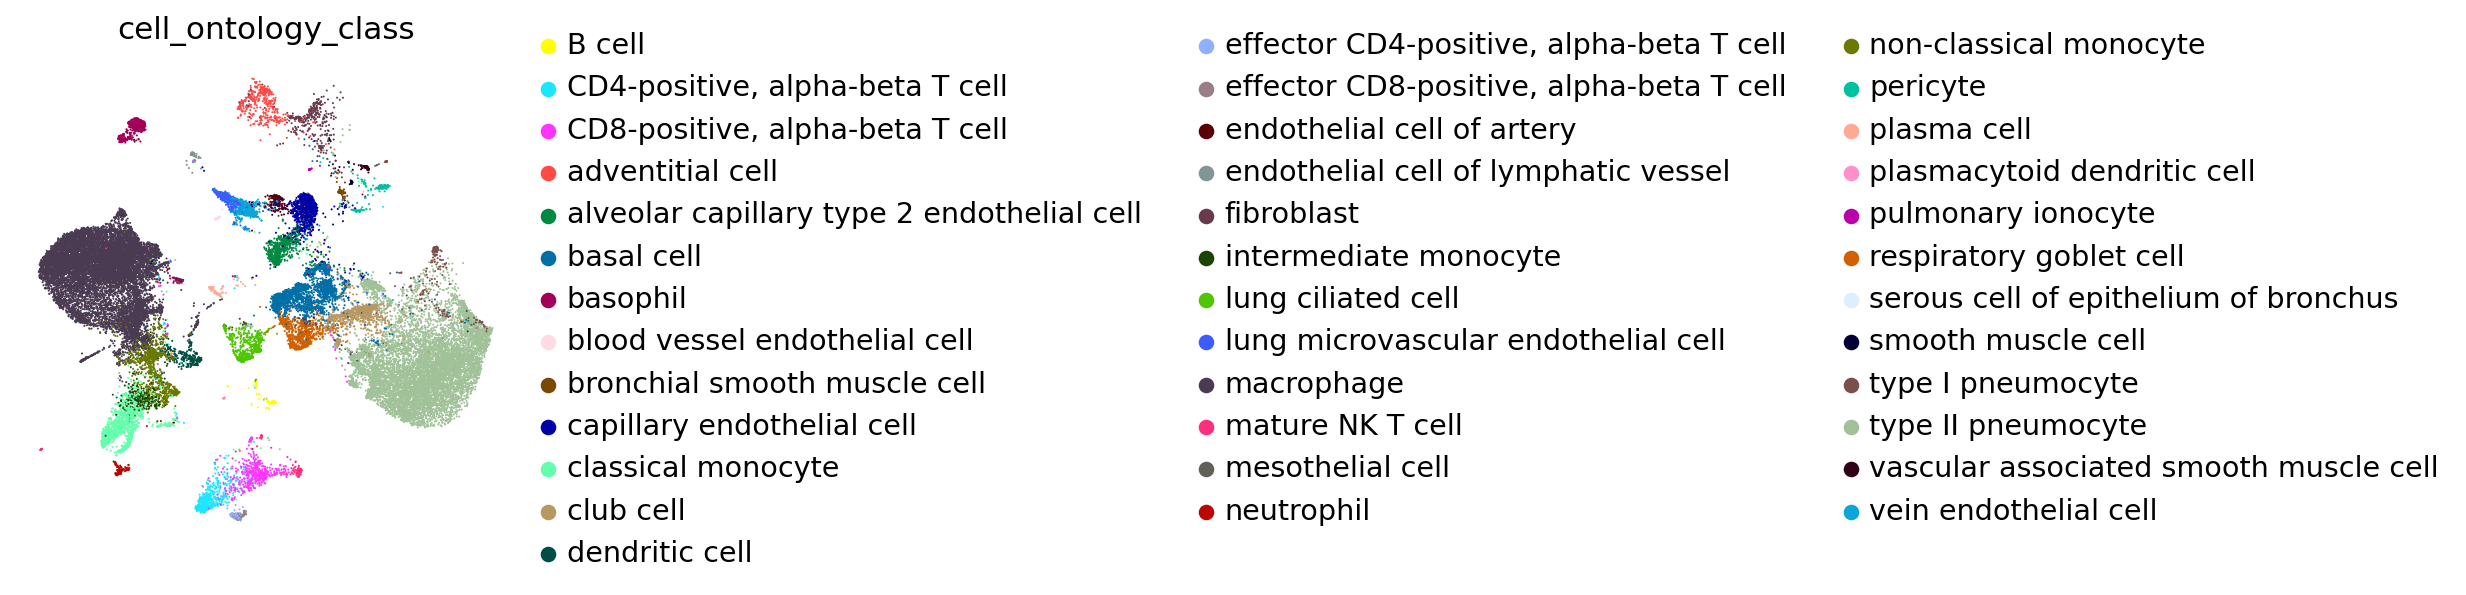

In [ ]:
sc.pl.umap(adata[adata.obs['_dataset']=='ref'],
           color=['cell_ontology_class'], ncols=1)

... storing 'harmonized_celltype' as categorical


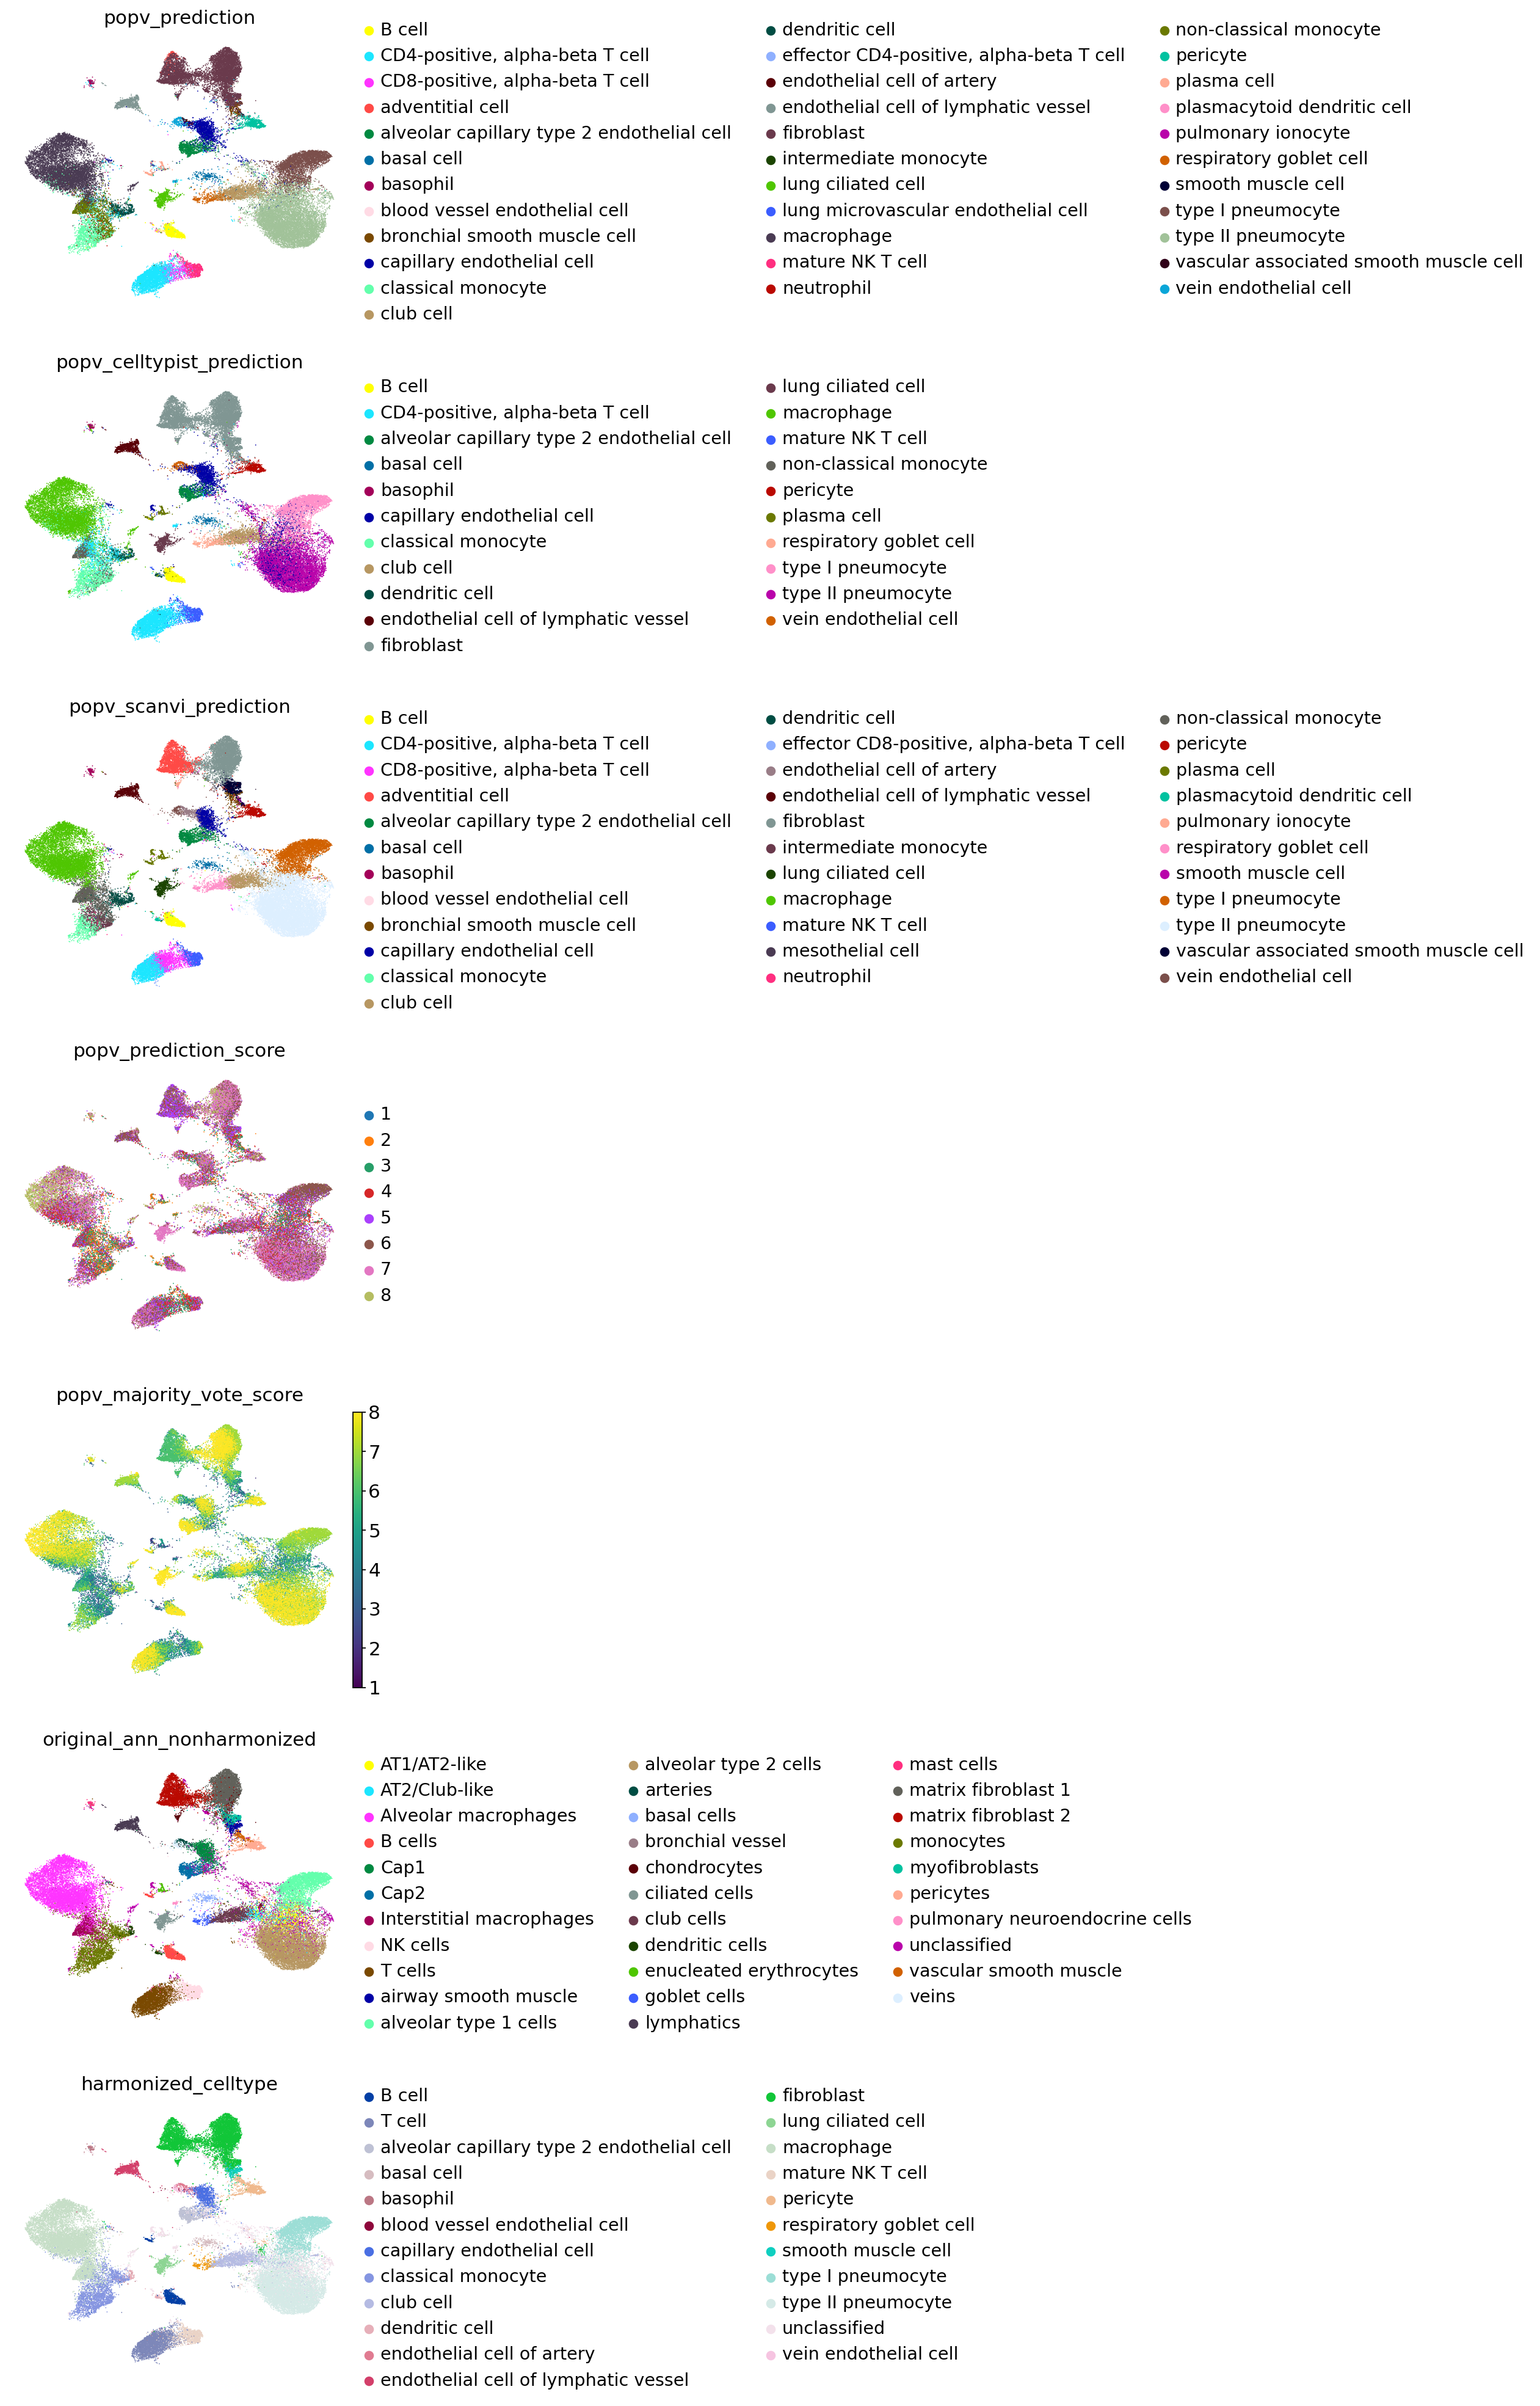

In [ ]:
sc.pl.umap(adata[adata.obs['_dataset']=='query'],
           color=['popv_prediction', 'popv_celltypist_prediction', 'popv_scanvi_prediction', 'popv_prediction_score', 'popv_majority_vote_score', 'original_ann_nonharmonized', 'harmonized_celltype'], ncols=1)

In [ ]:
adata[adata.obs['popv_majority_vote_prediction'] != adata.obs['popv_prediction']].obs[['cell_ontology_class', 'popv_majority_vote_score', 'popv_majority_vote_prediction', 'popv_prediction', 'popv_onclass_prediction', 'popv_onclass_seen']].drop_duplicates()

cell_ontology_class  \
TCTGGCTTCGCCACTT_TSP14_Lung_Proximal_10X_1_1  effector CD8-positive, alpha-beta T cell   
TCCTAATGTCCGGTCA_TSP14_Lung_Proximal_10X_1_1                          adventitial cell   
TGTCAGAAGAAATTGC_TSP14_Lung_Proximal_10X_1_1  effector CD4-positive, alpha-beta T cell   
GATTTCTTCTCGTCAC_TSP14_Lung_Proximal_10X_1_1                        smooth muscle cell   
TGATTCTGTGACTGTT_TSP14_Lung_Distal_10X_1_1    effector CD4-positive, alpha-beta T cell   
...                                                                                ...   
D231_TGACCCTCAAATGCGG-sub_wang_sub_batch4                                          NaN   
D231_AAAGAACTCGTTCGCT-sub_wang_sub_batch4                                          NaN   
D231_TTCATTGCAACTCCCT-sub_wang_sub_batch4                                          NaN   
D231_CGAATTGTCATTTGTC-sub_wang_sub_batch4                                          NaN   
D231_TCATTGTAGGTGATAT-sub_wang_sub_batch4                                          NaN   

                                              popv_majority_vote_score  \
TCTGGCTTCGCCACTT_TSP14_Lung_Proximal_10X_1_1                         4   
TCCTAATGTCCGGTCA_TSP14_Lung_Proximal_10X_1_1                         4   
TGTCAGAAGAAATTGC_TSP14_Lung_Proximal_10X_1_1                         4   
GATTTCTTCTCGTCAC_TSP14_Lung_Proximal_10X_1_1                         4   
TGATTCTGTGACTGTT_TSP14_Lung_Distal_10X_1_1                           4   
...                                                                ...   
D231_TGACCCTCAAATGCGG-sub_wang_sub_batch4                            3   
D231_AAAGAACTCGTTCGCT-sub_wang_sub_batch4                            3   
D231_TTCATTGCAACTCCCT-sub_wang_sub_batch4                            2   
D231_CGAATTGTCATTTGTC-sub_wang_sub_batch4                            2   
D231_TCATTGTAGGTGATAT-sub_wang_sub_batch4                            3   

                                                           popv_majority_vote_prediction  \
TCTGGCTTCGCCACTT_TSP14_Lung_Proximal_10X_1_1    effector CD8-positive, alpha-beta T cell   
TCCTAATGTCCGGTCA_TSP14_Lung_Proximal_10X_1_1                            adventitial cell   
TGTCAGAAGAAATTGC_TSP14_Lung_Proximal_10X_1_1    effector CD4-positive, alpha-beta T cell   
GATTTCTTCTCGTCAC_TSP14_Lung_Proximal_10X_1_1                                  fibroblast   
TGATTCTGTGACTGTT_TSP14_Lung_Distal_10X_1_1      effector CD4-positive, alpha-beta T cell   
...                                                                                  ...   
D231_TGACCCTCAAATGCGG-sub_wang_sub_batch4                                     macrophage   
D231_AAAGAACTCGTTCGCT-sub_wang_sub_batch4     alveolar capillary type 2 endothelial cell   
D231_TTCATTGCAACTCCCT-sub_wang_sub_batch4                             classical monocyte   
D231_CGAATTGTCATTTGTC-sub_wang_sub_batch4                             classical monocyte   
D231_TCATTGTAGGTGATAT-sub_wang_sub_batch4                                     macrophage   

                                                                       popv_prediction  \
TCTGGCTTCGCCACTT_TSP14_Lung_Proximal_10X_1_1  effector CD4-positive, alpha-beta T cell   
TCCTAATGTCCGGTCA_TSP14_Lung_Proximal_10X_1_1                                fibroblast   
TGTCAGAAGAAATTGC_TSP14_Lung_Proximal_10X_1_1           CD4-positive, alpha-beta T cell   
GATTTCTTCTCGTCAC_TSP14_Lung_Proximal_10X_1_1                        smooth muscle cell   
TGATTCTGTGACTGTT_TSP14_Lung_Distal_10X_1_1             CD8-positive, alpha-beta T cell   
...                                                                                ...   
D231_TGACCCTCAAATGCGG-sub_wang_sub_batch4                           classical monocyte   
D231_AAAGAACTCGTTCGCT-sub_wang_sub_batch4                   capillary endothelial cell   
D231_TTCATTGCAACTCCCT-sub_wang_sub_batch4                        intermediate monocyte   
D231_CGAATTGTCATTTGTC-sub_wang_sub_batch4                       non-classical monocyte   
D2

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def _prediction_eval(
    df,
    pred_name,
    label_name,
    name,
    x_label="",
    y_label="",
    save_fig=None,
):
    pred = df[pred_name]
    labels = df[label_name]
    """Generate confusion matrix."""
    types, _ = np.unique(np.concatenate([labels, pred]), return_inverse=True)
    mtx = confusion_matrix(labels, pred, normalize="true")
    df = pd.DataFrame(mtx, columns=types, index=types)
    df = df.loc[np.unique(labels), np.unique(pred)]
    df = df.rename_axis(x_label, axis="columns")
    df = df.rename_axis(y_label)
    df = df[pred.value_counts().index[pred.value_counts()>10]]
    df = df.loc[labels.value_counts().index[labels.value_counts()>1]]
    positions = [df.columns.get_loc(index) for index in df.idxmax(axis=1)]
    df = df.loc[df.index[np.argsort(positions)]]
    fig, ax = plt.subplots(figsize=[15, 15])
    sns.heatmap(df.T, linewidths=0.005, cmap="OrRd", square=True)
    plt.tight_layout()
    plt.title(name)
    if not x_label:
        x_label = pred_name
    if not y_label:
        y_label = label_name
    plt.ylabel(pred_name)
    plt.xlabel(label_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    if save_fig:
        plt.savefig(save_fig)
    plt.show()

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 46 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'I', 'K', 'N', 'R', 'T', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'six', 'slash', 'space', 't', 'two', 'u', 'underscore', 'v', 'w', 'x', 'y', 'z', 'zero']
Glyph IDs:   [0, 1, 2, 3, 16, 17, 18, 19, 20, 21, 23, 25, 27, 36, 37, 38, 44, 46, 49, 53, 55, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93]
Closed glyph list over 'GSUB': 51 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'I', 'K', 'N', 'R', 'T', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'fi', 'fl', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'six', 'sl

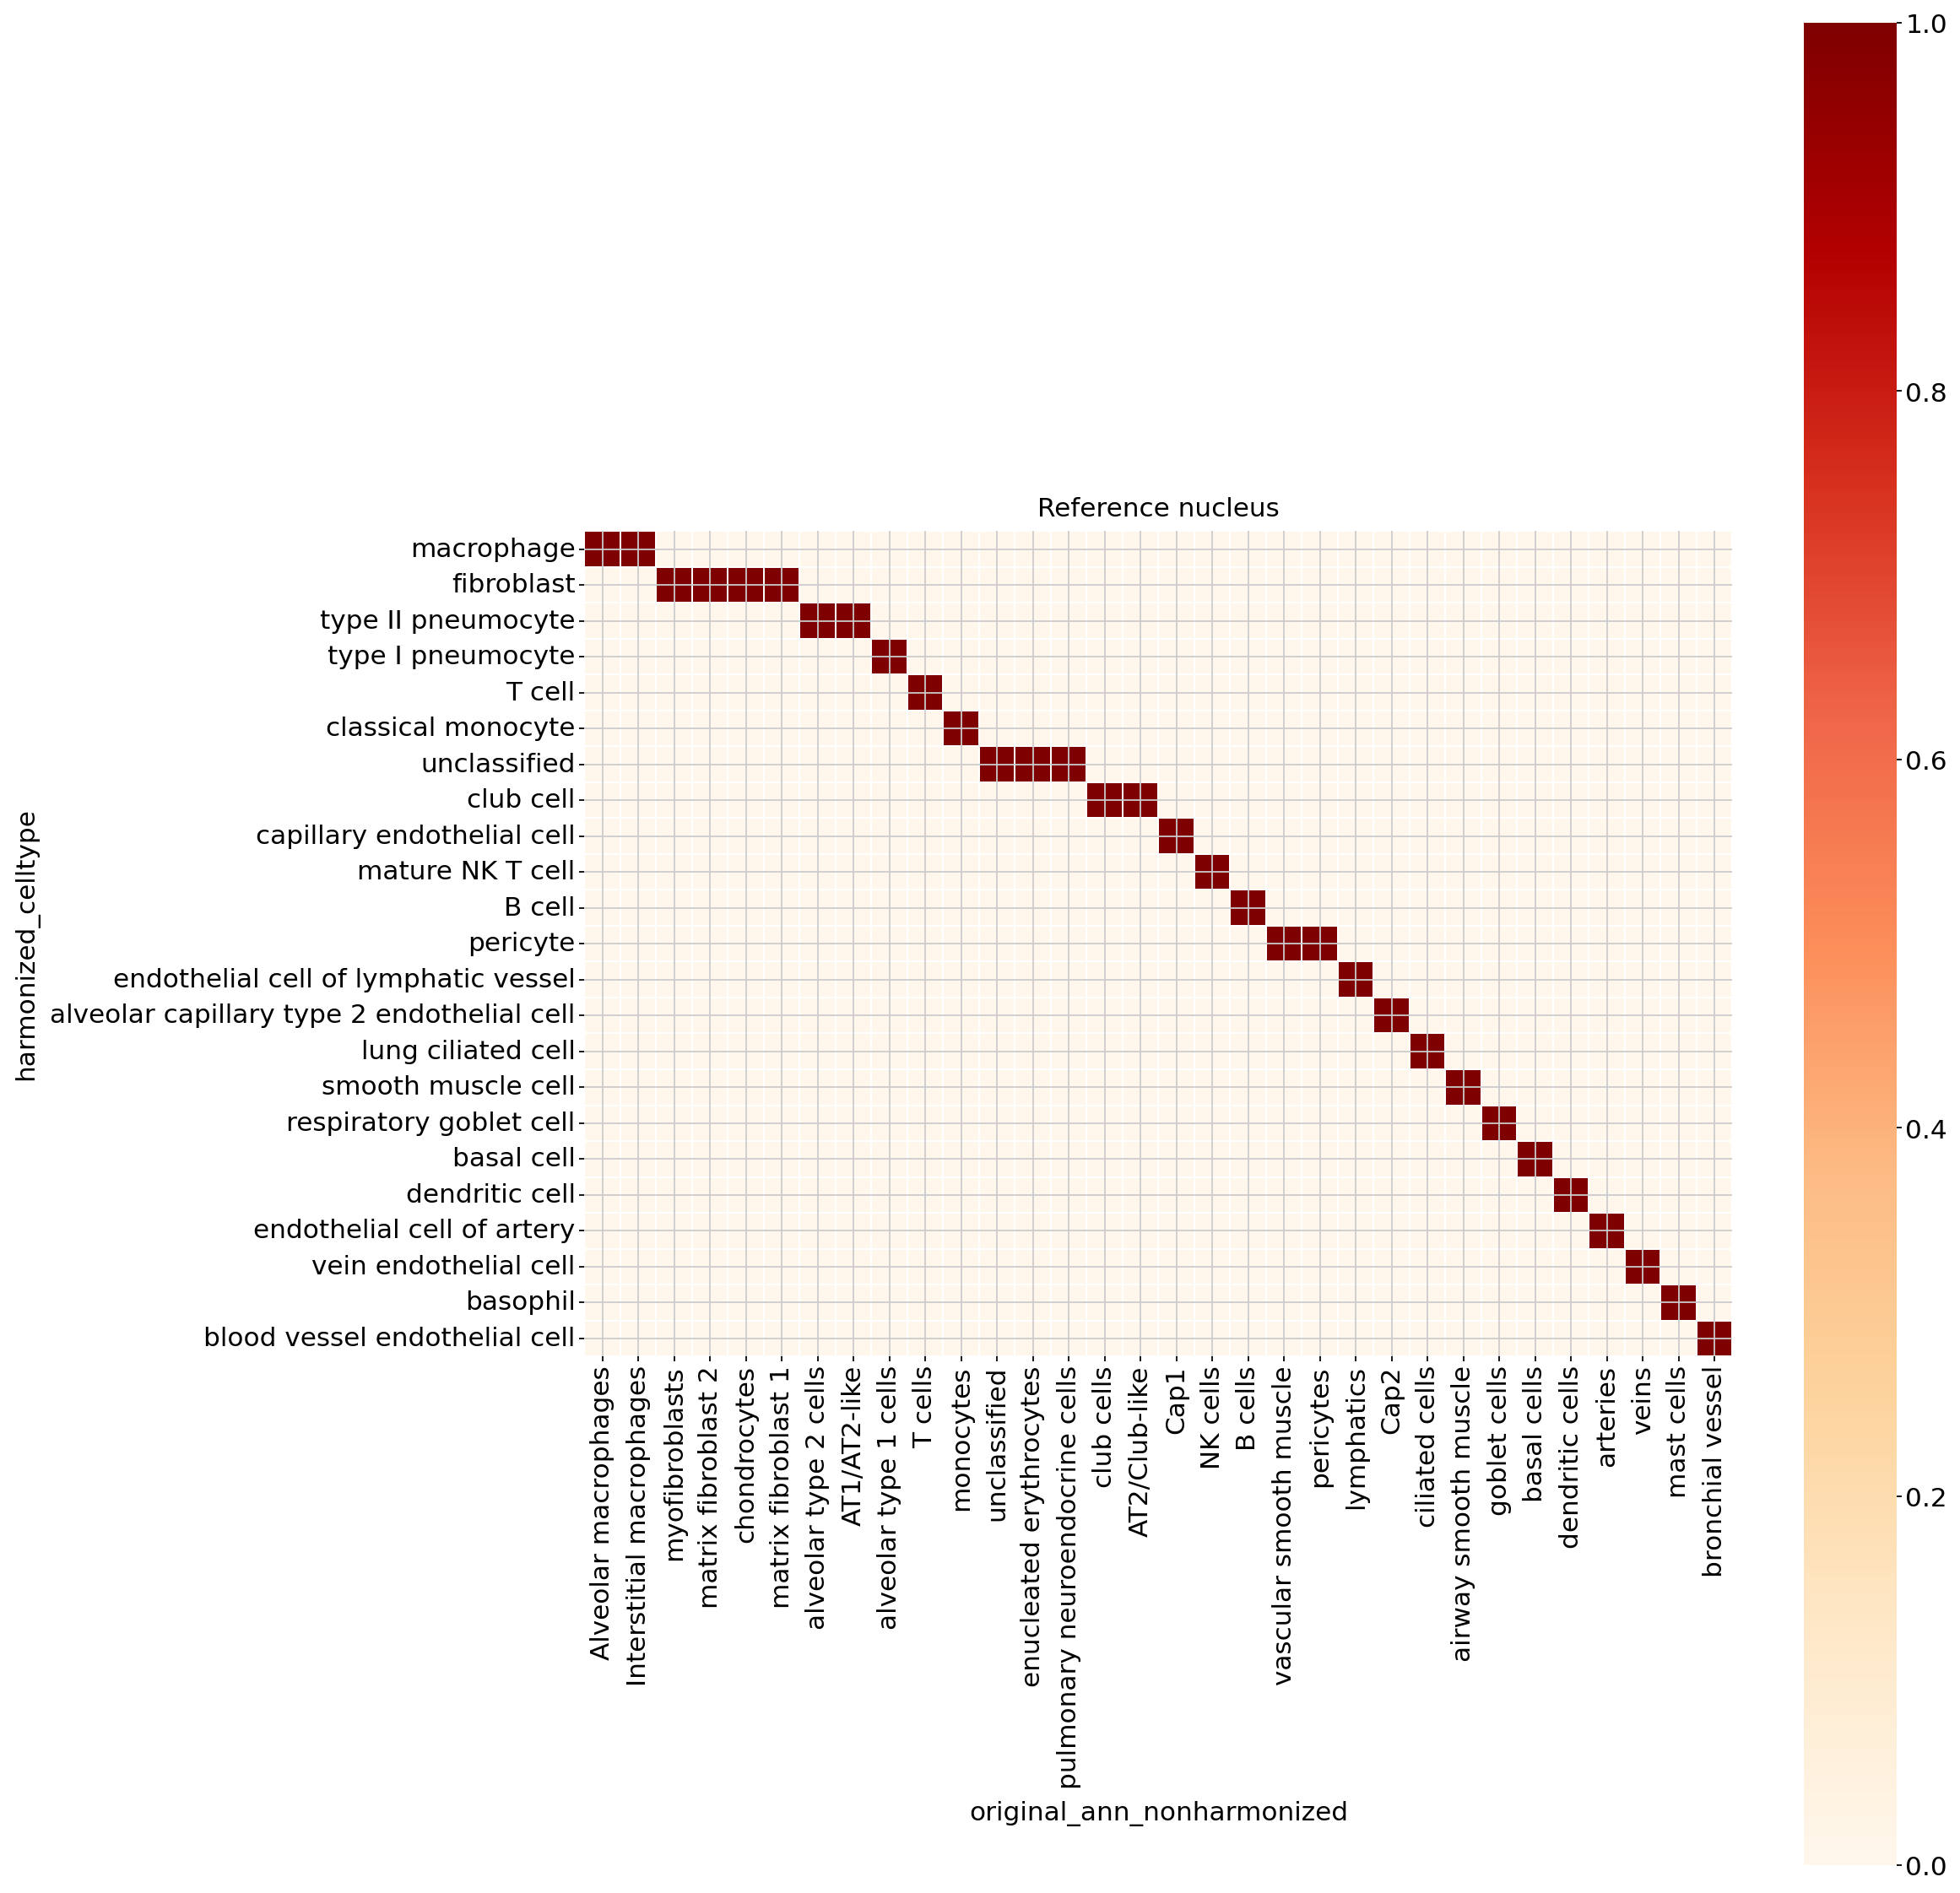

In [ ]:
_prediction_eval(adata[adata.obs['_dataset']=='query'].obs, name='Reference nucleus', pred_name='harmonized_celltype', label_name='original_ann_nonharmonized', save_fig=f'{output_folder}/popv_translation_query.pdf')

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 42 glyphs before
Glyph names: ['.notdef', '.null', 'B', 'C', 'D', 'I', 'K', 'N', 'R', 'T', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'six', 'space', 't', 'two', 'u', 'underscore', 'v', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 15, 16, 17, 19, 20, 21, 23, 25, 27, 37, 38, 39, 44, 46, 49, 53, 55, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92]
Closed glyph list over 'GSUB': 47 glyphs after
Glyph names: ['.notdef', '.null', 'B', 'C', 'D', 'I', 'K', 'N', 'R', 'T', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'fi', 'fl', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'six', 'space', 't', 'two', 'u', 'undersco

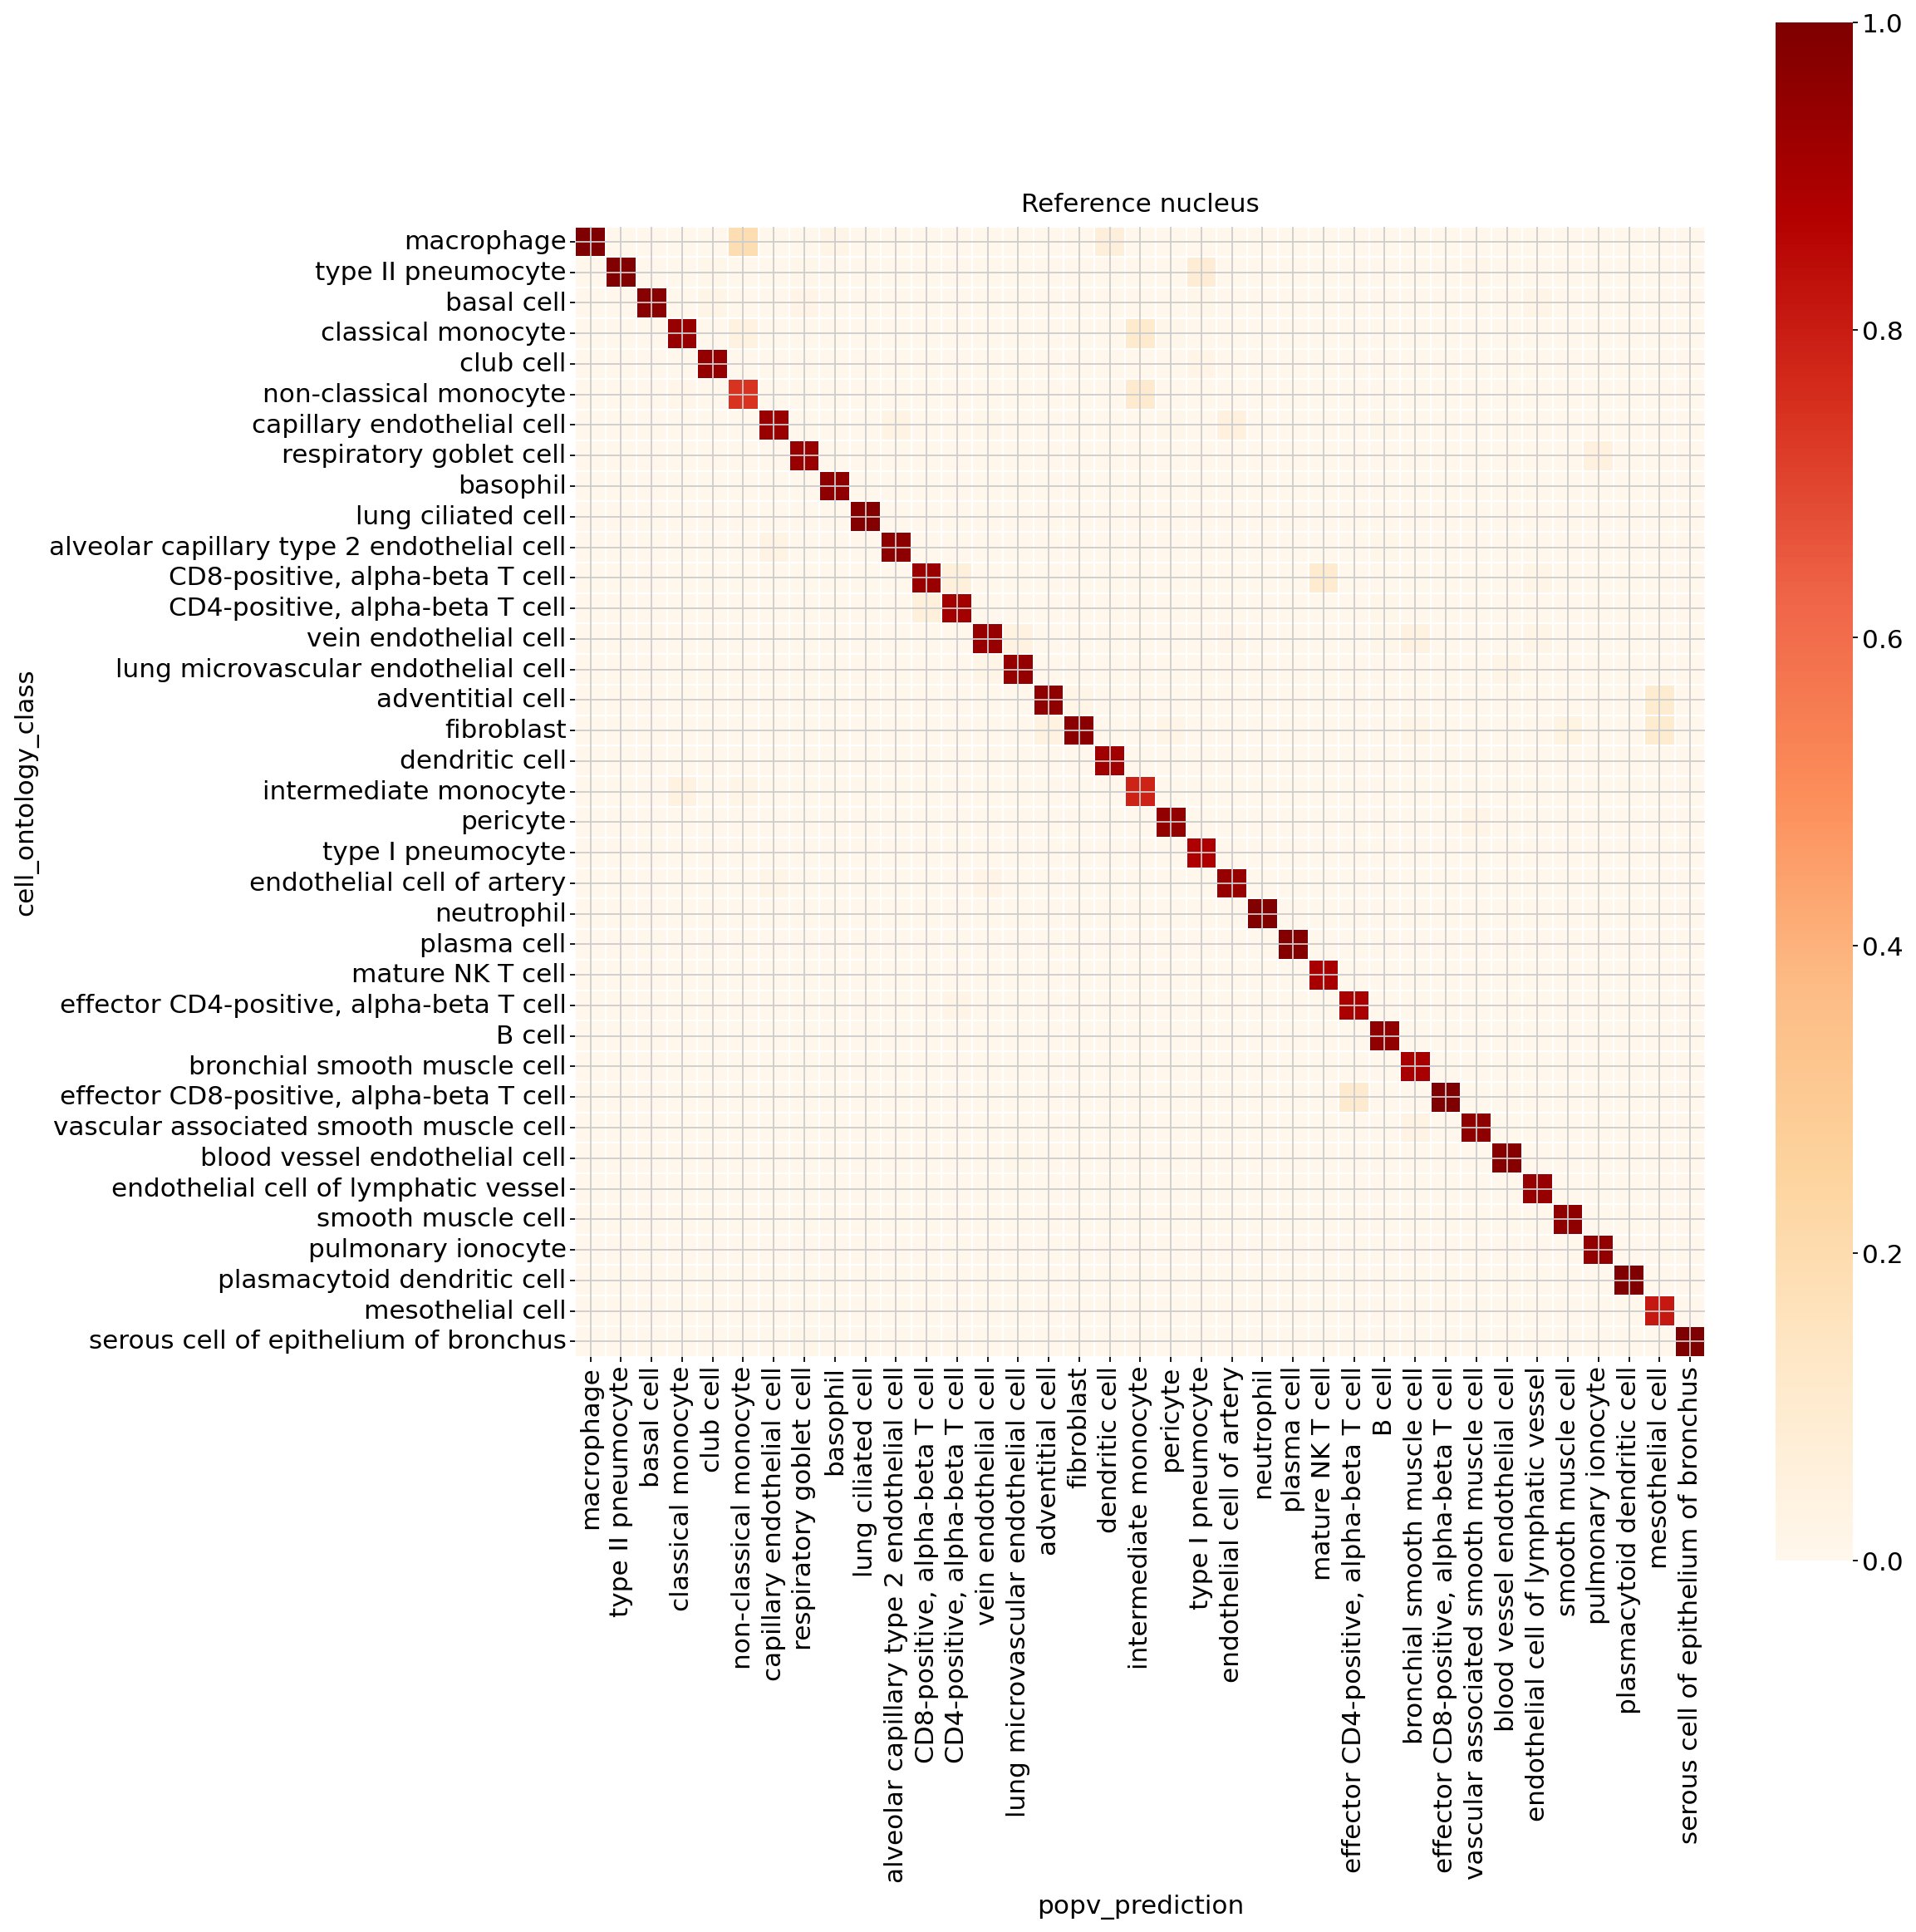

In [ ]:
_prediction_eval(adata[adata.obs['_dataset']=='ref'].obs, name='Reference nucleus', pred_name='cell_ontology_class', label_name='popv_prediction', save_fig=f'{output_folder}/popv_agreement_nucleus_ref.pdf')

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 42 glyphs before
Glyph names: ['.notdef', '.null', 'B', 'C', 'D', 'I', 'K', 'N', 'R', 'T', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'period', 'r', 's', 'six', 'space', 't', 'two', 'u', 'underscore', 'v', 'y', 'z', 'zero']
Glyph IDs:   [0, 1, 2, 3, 15, 16, 17, 19, 21, 23, 25, 27, 37, 38, 39, 44, 46, 49, 53, 55, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92, 93]
Closed glyph list over 'GSUB': 47 glyphs after
Glyph names: ['.notdef', '.null', 'B', 'C', 'D', 'I', 'K', 'N', 'R', 'T', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'fi', 'fl', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'p', 'period', 'r', 's', 'six', 'space', 't', 'two', 'u', 'underscore', 'uni

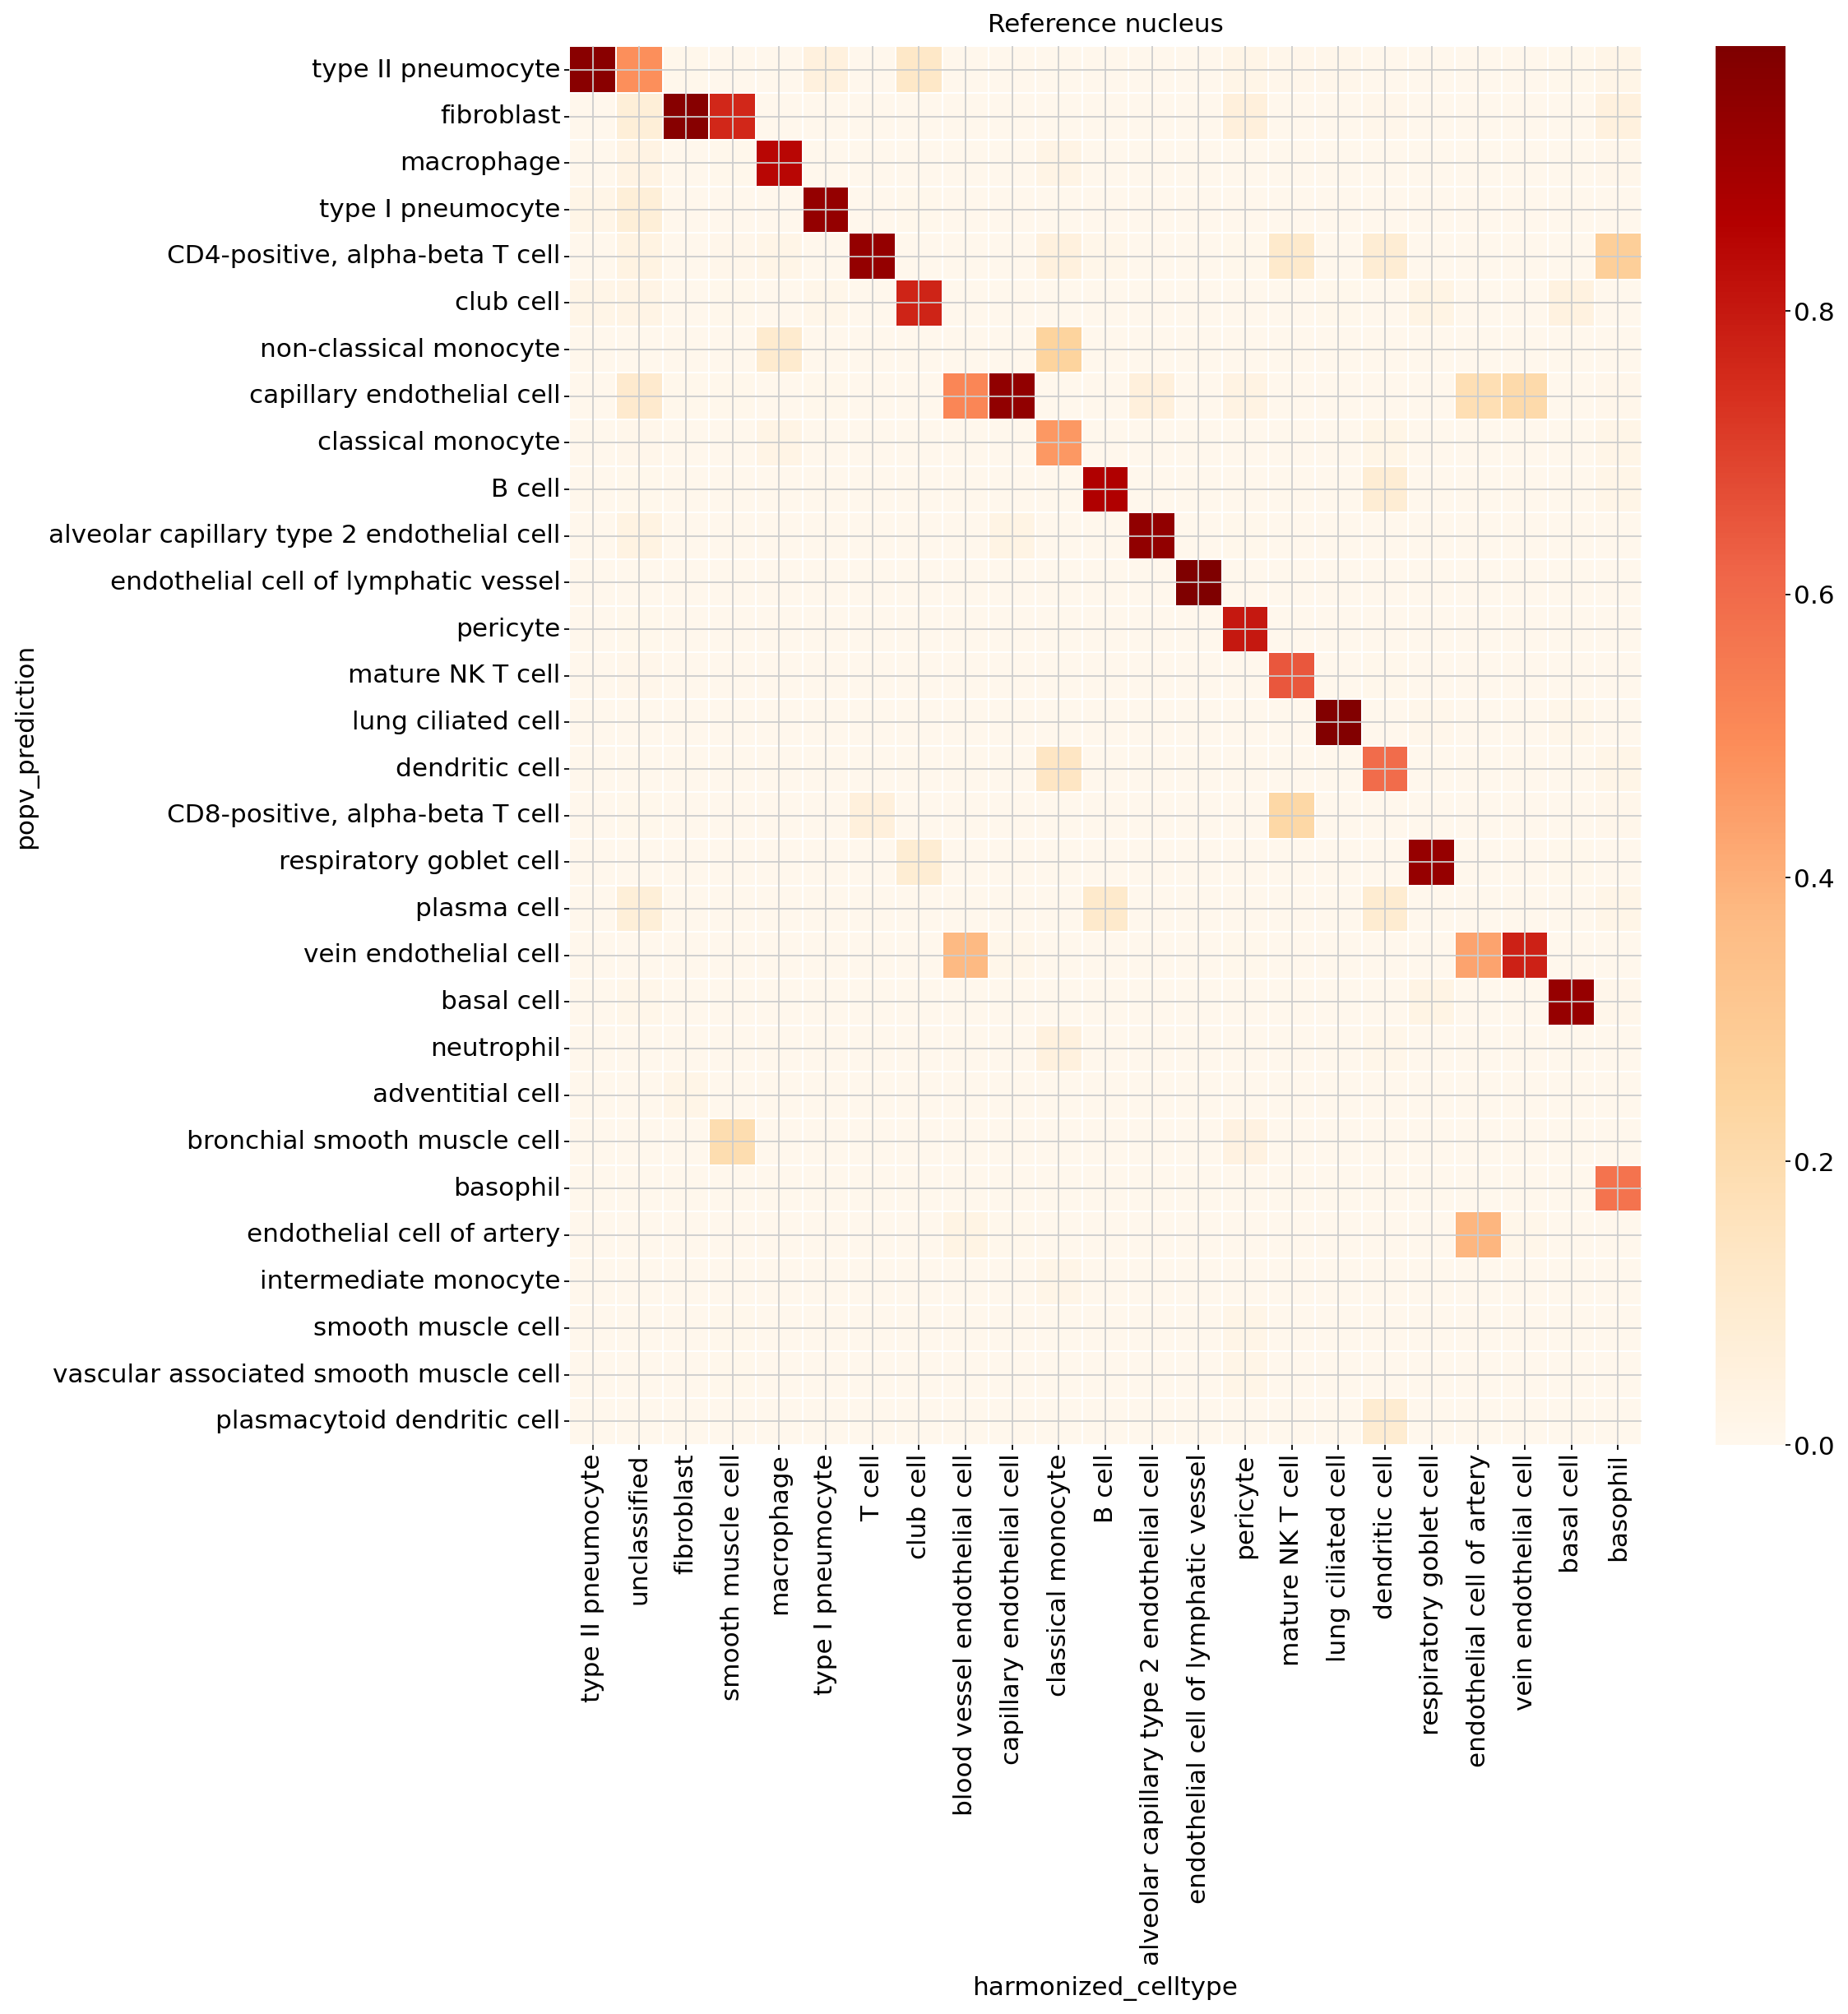

In [ ]:
_prediction_eval(adata[adata.obs['_dataset']=='query'].obs, name='Reference nucleus', pred_name='popv_prediction', label_name='harmonized_celltype', save_fig=f'{output_folder}/popv_agreement_nucleus_query.pdf')

In [ ]:
for pred in list(adata.uns['prediction_keys']) + ['popv_onclass_seen']:
    _prediction_eval(adata[adata.obs['_dataset']=='query'].obs, name='Reference nucleus', pred_name=pred, label_name='harmonized_celltype', save_fig=f'{output_folder}/{pred}_agreement_nucleus_query.pdf')

In [ ]:
from popv.reproducibility import _accuracy

In [66]:
obo_fn = '/data/extra_files/galen_dropbox_figures/can_reproducibility/PopV/ontology/cl.obo'

G = popv._utils.make_ontology_dag(obo_fn)
pred_keys = adata.uns['prediction_keys']
query_adata = adata[np.logical_and(adata.obs['_dataset']=='query', adata.obs['harmonized_celltype']!='unclassified')]

_accuracy._ontology_accuracy(
    query_adata, 
    obofile=obo_fn,
    gt_key='harmonized_celltype', 
    pred_key='popv_prediction',
    save_key='consensus_ontology_accuracy')
for k in pred_keys:
    print(k)
    _accuracy._ontology_accuracy(
        query_adata,
        obofile=obo_fn,
        gt_key='harmonized_celltype', 
        pred_key=k,
        save_key=f'{k}_ontology_accuracy')

popv_celltypist_prediction
popv_knn_on_bbknn_prediction
popv_knn_on_scanorama_prediction
popv_knn_on_scvi_prediction
popv_onclass_prediction
popv_rf_prediction
popv_scanvi_prediction
popv_svm_prediction


In [68]:
accuracy_replace_dict = {'exact': 'Exact Match', 
                         'parent': 'Parent Match',
                         'child': "Child Match",
                         'sibling': 'Sibling Match',
                         'no match': 'No Match'
                        }

ontology_vote_cols = [s for s in query_adata.obs.keys() if s.endswith('ontology_accuracy')]

cat_order = [
    "Exact Match",
    "Parent Match",
    "Child Match",
    "Sibling Match",
    "No Match",
]

for s in ontology_vote_cols:
    print(s)
    query_adata.obs[f'{s}_annotated'] = query_adata.obs[s].replace(accuracy_replace_dict)
    query_adata.obs[f'{s}_annotated'] = query_adata.obs[f'{s}_annotated'].astype('category')
    query_adata.obs[f'{s}_annotated'] = query_adata.obs[f'{s}_annotated'].cat.add_categories(set(cat_order)-set(query_adata.obs[f'{s}_annotated'].cat.categories))
    query_adata.obs[f'{s}_annotated'] = query_adata.obs[f'{s}_annotated'].values.reorder_categories(cat_order)

consensus_ontology_accuracy
popv_celltypist_prediction_ontology_accuracy
popv_knn_on_bbknn_prediction_ontology_accuracy
popv_knn_on_scanorama_prediction_ontology_accuracy
popv_knn_on_scvi_prediction_ontology_accuracy
popv_onclass_prediction_ontology_accuracy
popv_rf_prediction_ontology_accuracy
popv_scanvi_prediction_ontology_accuracy
popv_svm_prediction_ontology_accuracy


In [69]:
acc_annotated_cols = [s for s in query_adata.obs.keys() if s.endswith('_annotated')]

In [70]:
df = query_adata.obs[acc_annotated_cols].apply(pd.Series.value_counts)


In [72]:
query_adata.obs['popv_prediction_probabilities'] = query_adata.obs['popv_prediction_score'].astype(float)/query_adata.obs['popv_prediction_score'].astype(float).max()

In [74]:
acc_annotated_cols_dict = {
    'consensus_ontology_accuracy_annotated': 'popv_prediction',
    'popv_celltypist_prediction_ontology_accuracy_annotated': 'popv_celltypist_prediction',
    'popv_knn_on_bbknn_prediction_ontology_accuracy_annotated': 'popv_knn_on_bbknn_prediction',
    'popv_knn_on_scanorama_prediction_ontology_accuracy_annotated': 'popv_knn_on_scanorama_prediction',
    'popv_knn_on_scvi_prediction_ontology_accuracy_annotated': 'popv_knn_on_scvi_prediction',
    'popv_rf_prediction_ontology_accuracy_annotated': 'popv_rf_prediction',
    'popv_svm_prediction_ontology_accuracy_annotated': 'popv_svm_prediction',
    'popv_scanvi_prediction_ontology_accuracy_annotated': 'popv_scanvi_prediction',
    'popv_onclass_prediction_ontology_accuracy_annotated': 'popv_onclass_prediction',
}

In [75]:
rename_dict = {
    'popv_prediction': 'popV',
    'popv_celltypist_prediction': 'Celltypist',
    'popv_knn_on_bbknn_prediction': 'KNN on BBKNN',
    'popv_knn_on_scanorama_prediction': 'KNN on Scanorama',
    'popv_knn_on_scvi_prediction': 'KNN on scVI',
    'popv_onclass_seen': 'OnClass (seen)',
    'popv_rf_prediction': 'Random Forest',
    'popv_svm_prediction': 'SVM',
    'seurat_prediction': 'Seurat',
    'popv_scanvi_prediction': 'scANVI',
    'popv_onclass_prediction': 'OnClass',
}

In [77]:
query_adatas = query_adata[query_adata.obs['harmonized_celltype']!='T cell']

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 51 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'F', 'I', 'K', 'M', 'N', 'O', 'P', 'R', 'S', 'V', 'a', 'c', 'colon', 'd', 'e', 'eight', 'equal', 'f', 'five', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 32, 36, 37, 38, 41, 44, 46, 48, 49, 50, 51, 53, 54, 57, 68, 70, 71, 72, 73, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92]
Closed glyph list over 'GSUB': 56 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'F', 'I', 'K', 'M', 'N', 'O', 'P', 'R', 'S', 'V', 'a', 'c', 'colon', 'd', 'e', 'eight', 'equal', 'f', 'fi', 'five', 'fl'

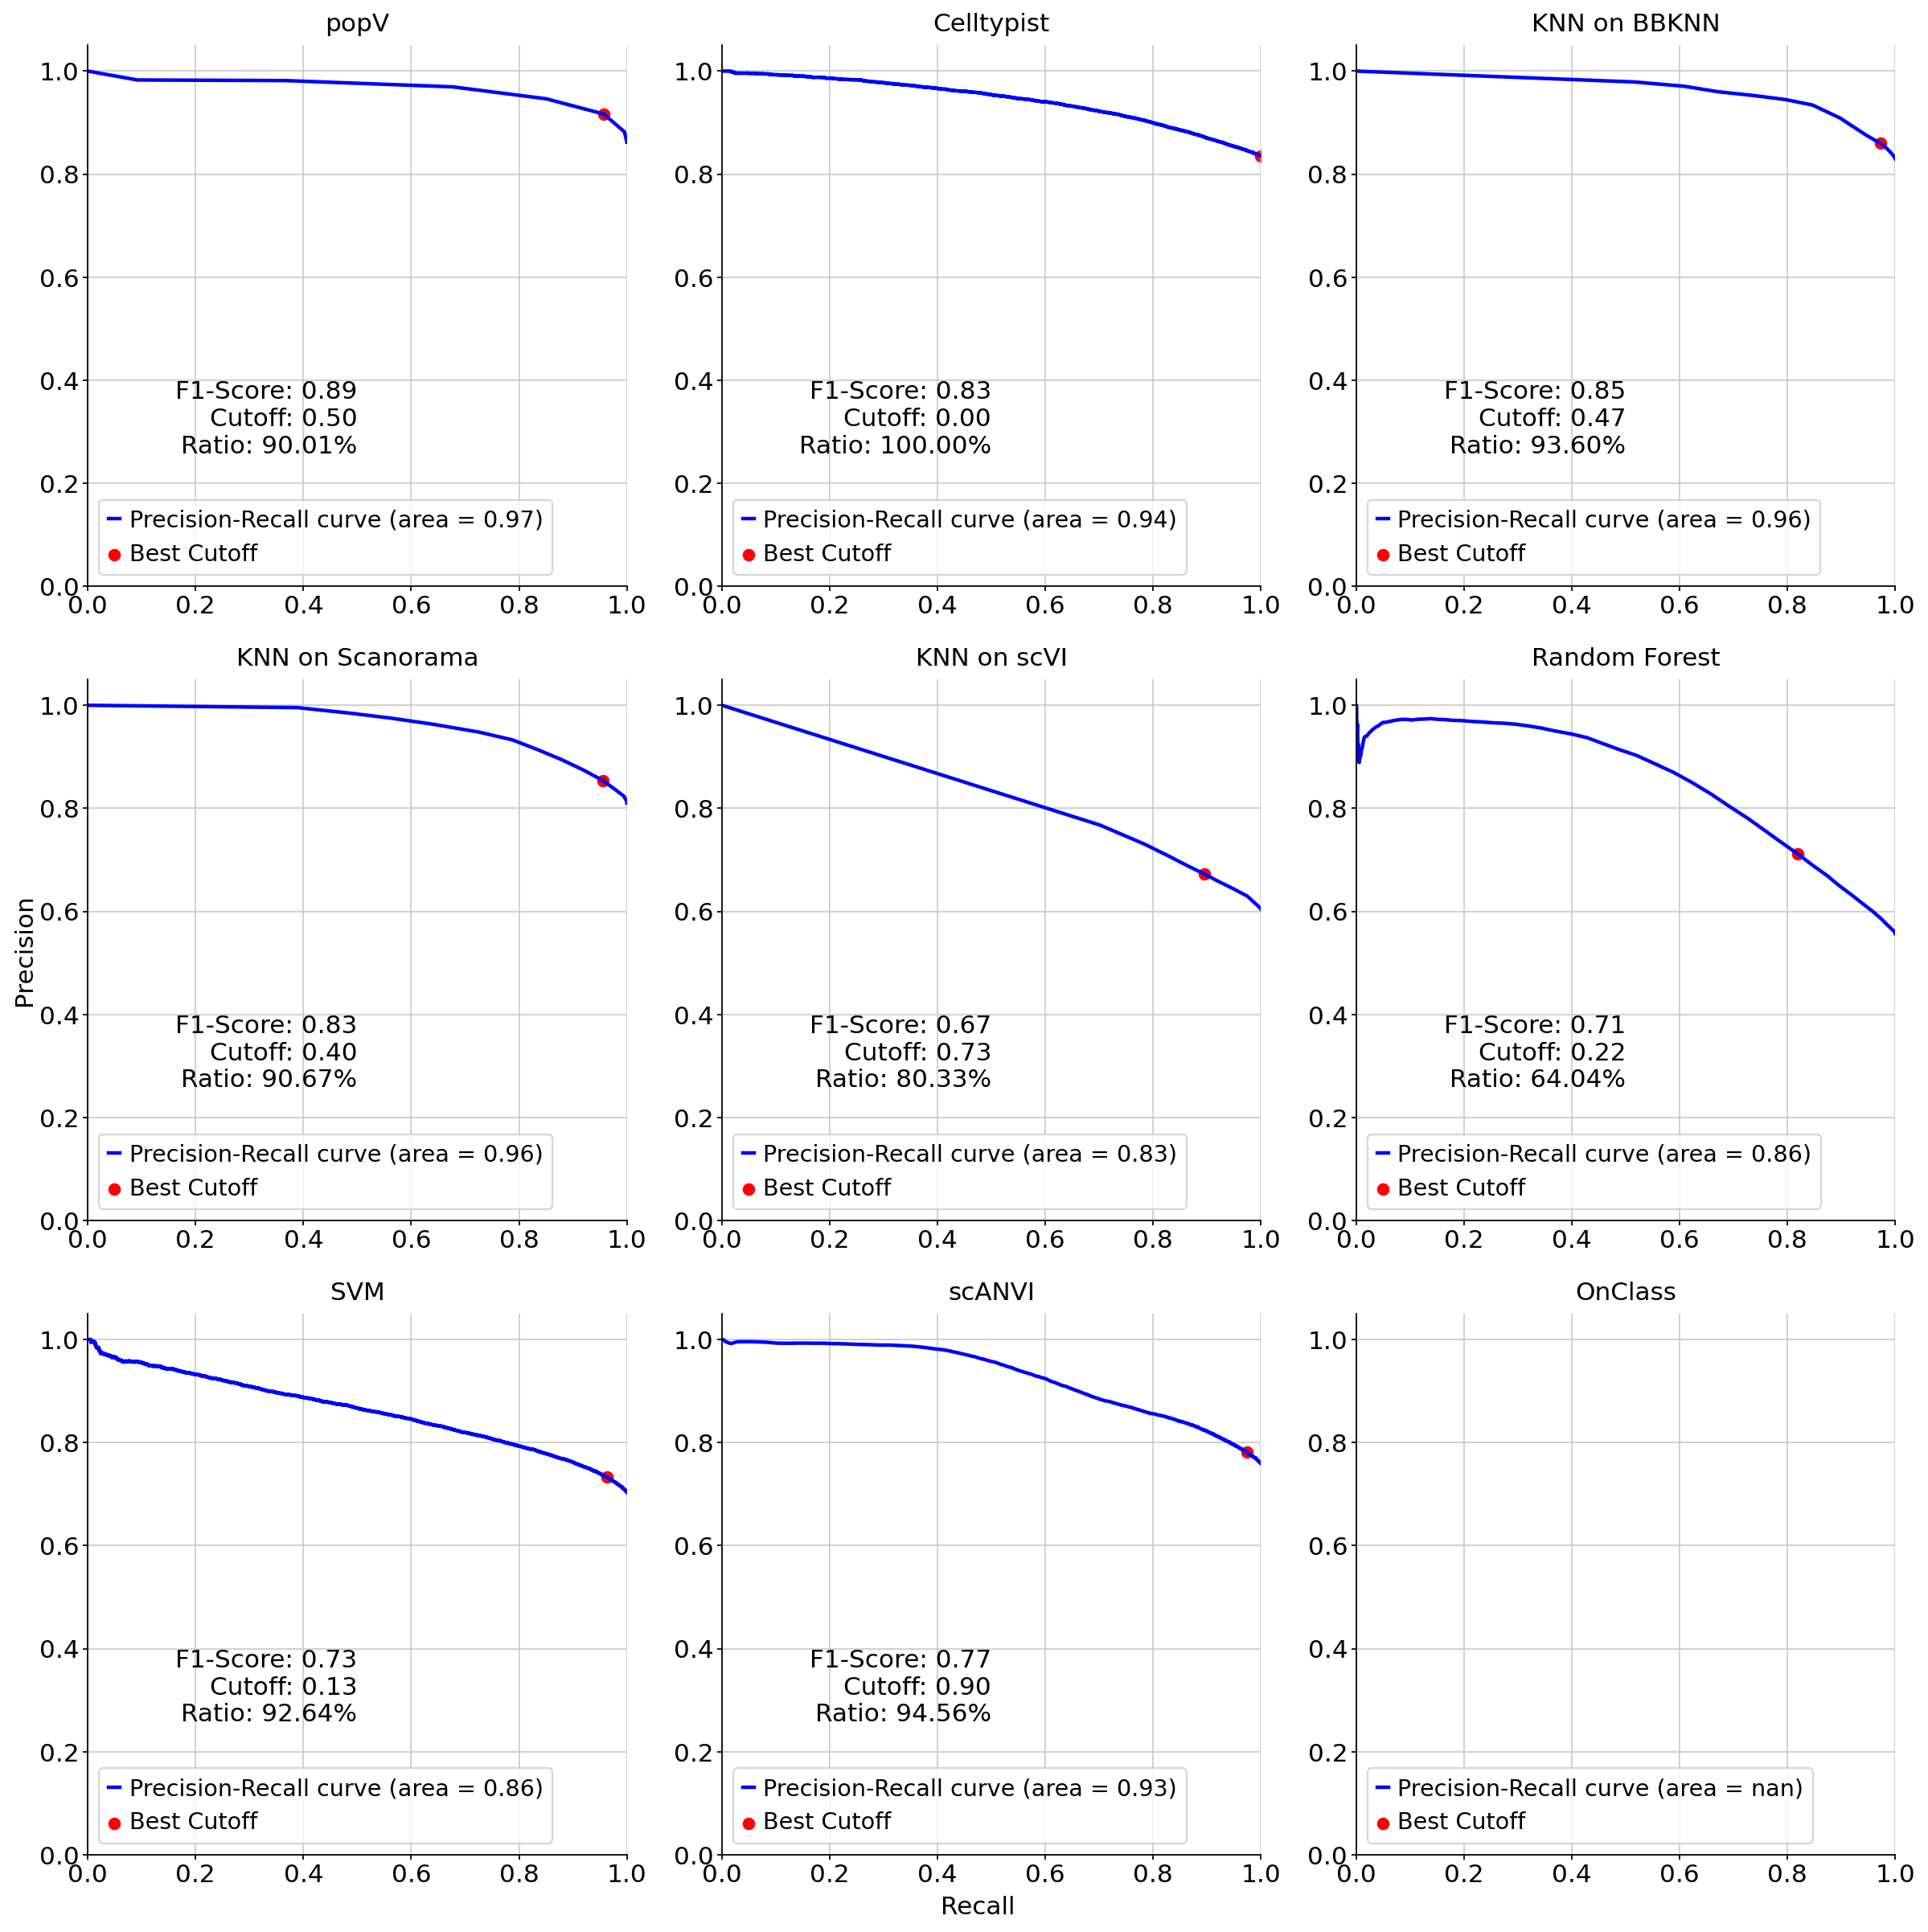

In [80]:
from sklearn.metrics import precision_recall_curve, auc, accuracy_score

scores = [1, 2, 3, 4, 5, 6, 7, 8]
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
idx = -1
for ontology_accuracy, prediction_key in acc_annotated_cols_dict.items():
    idx += 1
    
    y_val = query_adatas.obs[ontology_accuracy]=='Exact Match'
    probabilities = query_adatas.obs[prediction_key+'_probabilities']

    # Compute Precision-Recall curve and area under the curve
    precision, recall, thresholds = precision_recall_curve(y_val, probabilities)
    pr_auc = auc(recall, precision)

    # Calculate the F1 score to find the best threshold (cutoff)
    f1_scores = 2*recall*precision / (recall + precision + 1e-3)
    best_idx = np.argmax(f1_scores)
    best_cutoff = thresholds[best_idx]

    # Apply the best cutoff to make final predictions
    predictions = np.where(probabilities > (best_cutoff - 1e-3), 1, 0)

    # Calculate the accuracy of predictions above the cutoff
    accuracy_above_cutoff = accuracy_score(y_val, predictions)
    axs_ = axs[idx//3, idx%3]
    
    axs_.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    axs_.scatter(recall[best_idx], precision[best_idx], marker='o', color='red', label='Best Cutoff')
    axs_.annotate(f'F1-Score: {accuracy_above_cutoff:.2f}\nCutoff: {best_cutoff:.2f}\nRatio: {(np.mean(predictions) * 100):.2f}%',
                xy=(recall[best_idx], precision[best_idx]), xytext=(0.5, 0.4),
                horizontalalignment='right', verticalalignment='top')
    axs_.legend(loc="lower left")
    axs_.set_title(rename_dict[prediction_key])
    axs_.set_xlim([0.0, 1.0])
    axs_.set_ylim([0.0, 1.05])

    #axs_.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=3)
    #plt.savefig(f'fig4/fig4_thymus_prediction_accuracy_{prediction_key}.pdf', bbox_inches='tight')
#axs[-1, -1].axis('off')
fig.text(0.5, 0, 'Recall', ha='center')
fig.text(0, 0.5, 'Precision', va='center', rotation='vertical')
fig.tight_layout()
plt.savefig(f'{output_folder}/nucleus_precision_recall.pdf', bbox_inches='tight')
plt.show()


In [ ]:
parent = 'parent'
child = 'child'
exact = 'exact'
sibling = 'sibling'

color_map = ['#1f77b4',
             '#2ca02c',
             '#9467bd',
             '#ff7f0e',
             '#d62728',
             '#8c564b',
             '#e377c2',
             '#7f7f7f',
             '#bcbd22',
             '#17becf']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df

consensus_ontology_accuracy_annotated  \
child                                      36.0   
exact                                   35278.0   
no match                                 6421.0   
parent                                      NaN   
sibling                                  2289.0   

          popv_celltypist_prediction_ontology_accuracy_annotated  \
child                                                   8.0        
exact                                               34170.0        
no match                                             7821.0        
parent                                                  NaN        
sibling                                              2025.0        

          popv_knn_on_bbknn_prediction_ontology_accuracy_annotated  \
child                                                  19.0          
exact                                               33881.0          
no match                                             6660.0          
parent                                                  NaN          
sibling                                              3464.0          

          popv_knn_on_scanorama_prediction_ontology_accuracy_annotated  \
child                                                     1              
exact                                                 33158              
no match                                               8019              
parent                                                    3              
sibling                                                2843              

          popv_knn_on_scvi_prediction_ontology_accuracy_annotated  \
child                                                  41.0         
exact                                               24717.0         
no match                                            11363.0         
parent                                                  NaN         
sibling                                              7903.0         

          popv_onclass_prediction_ontology_accuracy_annotated  \
child                                                9352.0     
exact                                                   NaN     
no match                                             9552.0     
parent                                              22983.0     
sibling                                              2137.0     

          popv_rf_prediction_ontology_accuracy_annotated  \
child                                               25.0   
exact                                            22784.0   
no match                                         13587.0   
parent                                               NaN   
sibling                                           7628.0   

          popv_scanvi_prediction_ontology_accuracy_annotated  \
child                                                   369    
exact                                                 31063    
no match                                               7345    
parent                                                    2    
sibling                                                5245    

          popv_svm_prediction_ontology_accuracy_annotated  
child                                                  64  
exact                                               28764  
no match                                            12137  
parent                                                  4  
sibling                                              3055

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 53 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'E', 'F', 'I', 'K', 'M', 'N', 'O', 'P', 'R', 'S', 'V', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'f', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'x', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 32, 36, 37, 38, 40, 41, 44, 46, 48, 49, 50, 51, 53, 54, 57, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 91, 92]
Closed glyph list over 'GSUB': 58 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'E', 'F', 'I', 'K', 'M', 'N', 'O', 'P', 'R', 'S', 'V', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'f', 'fi', 'f

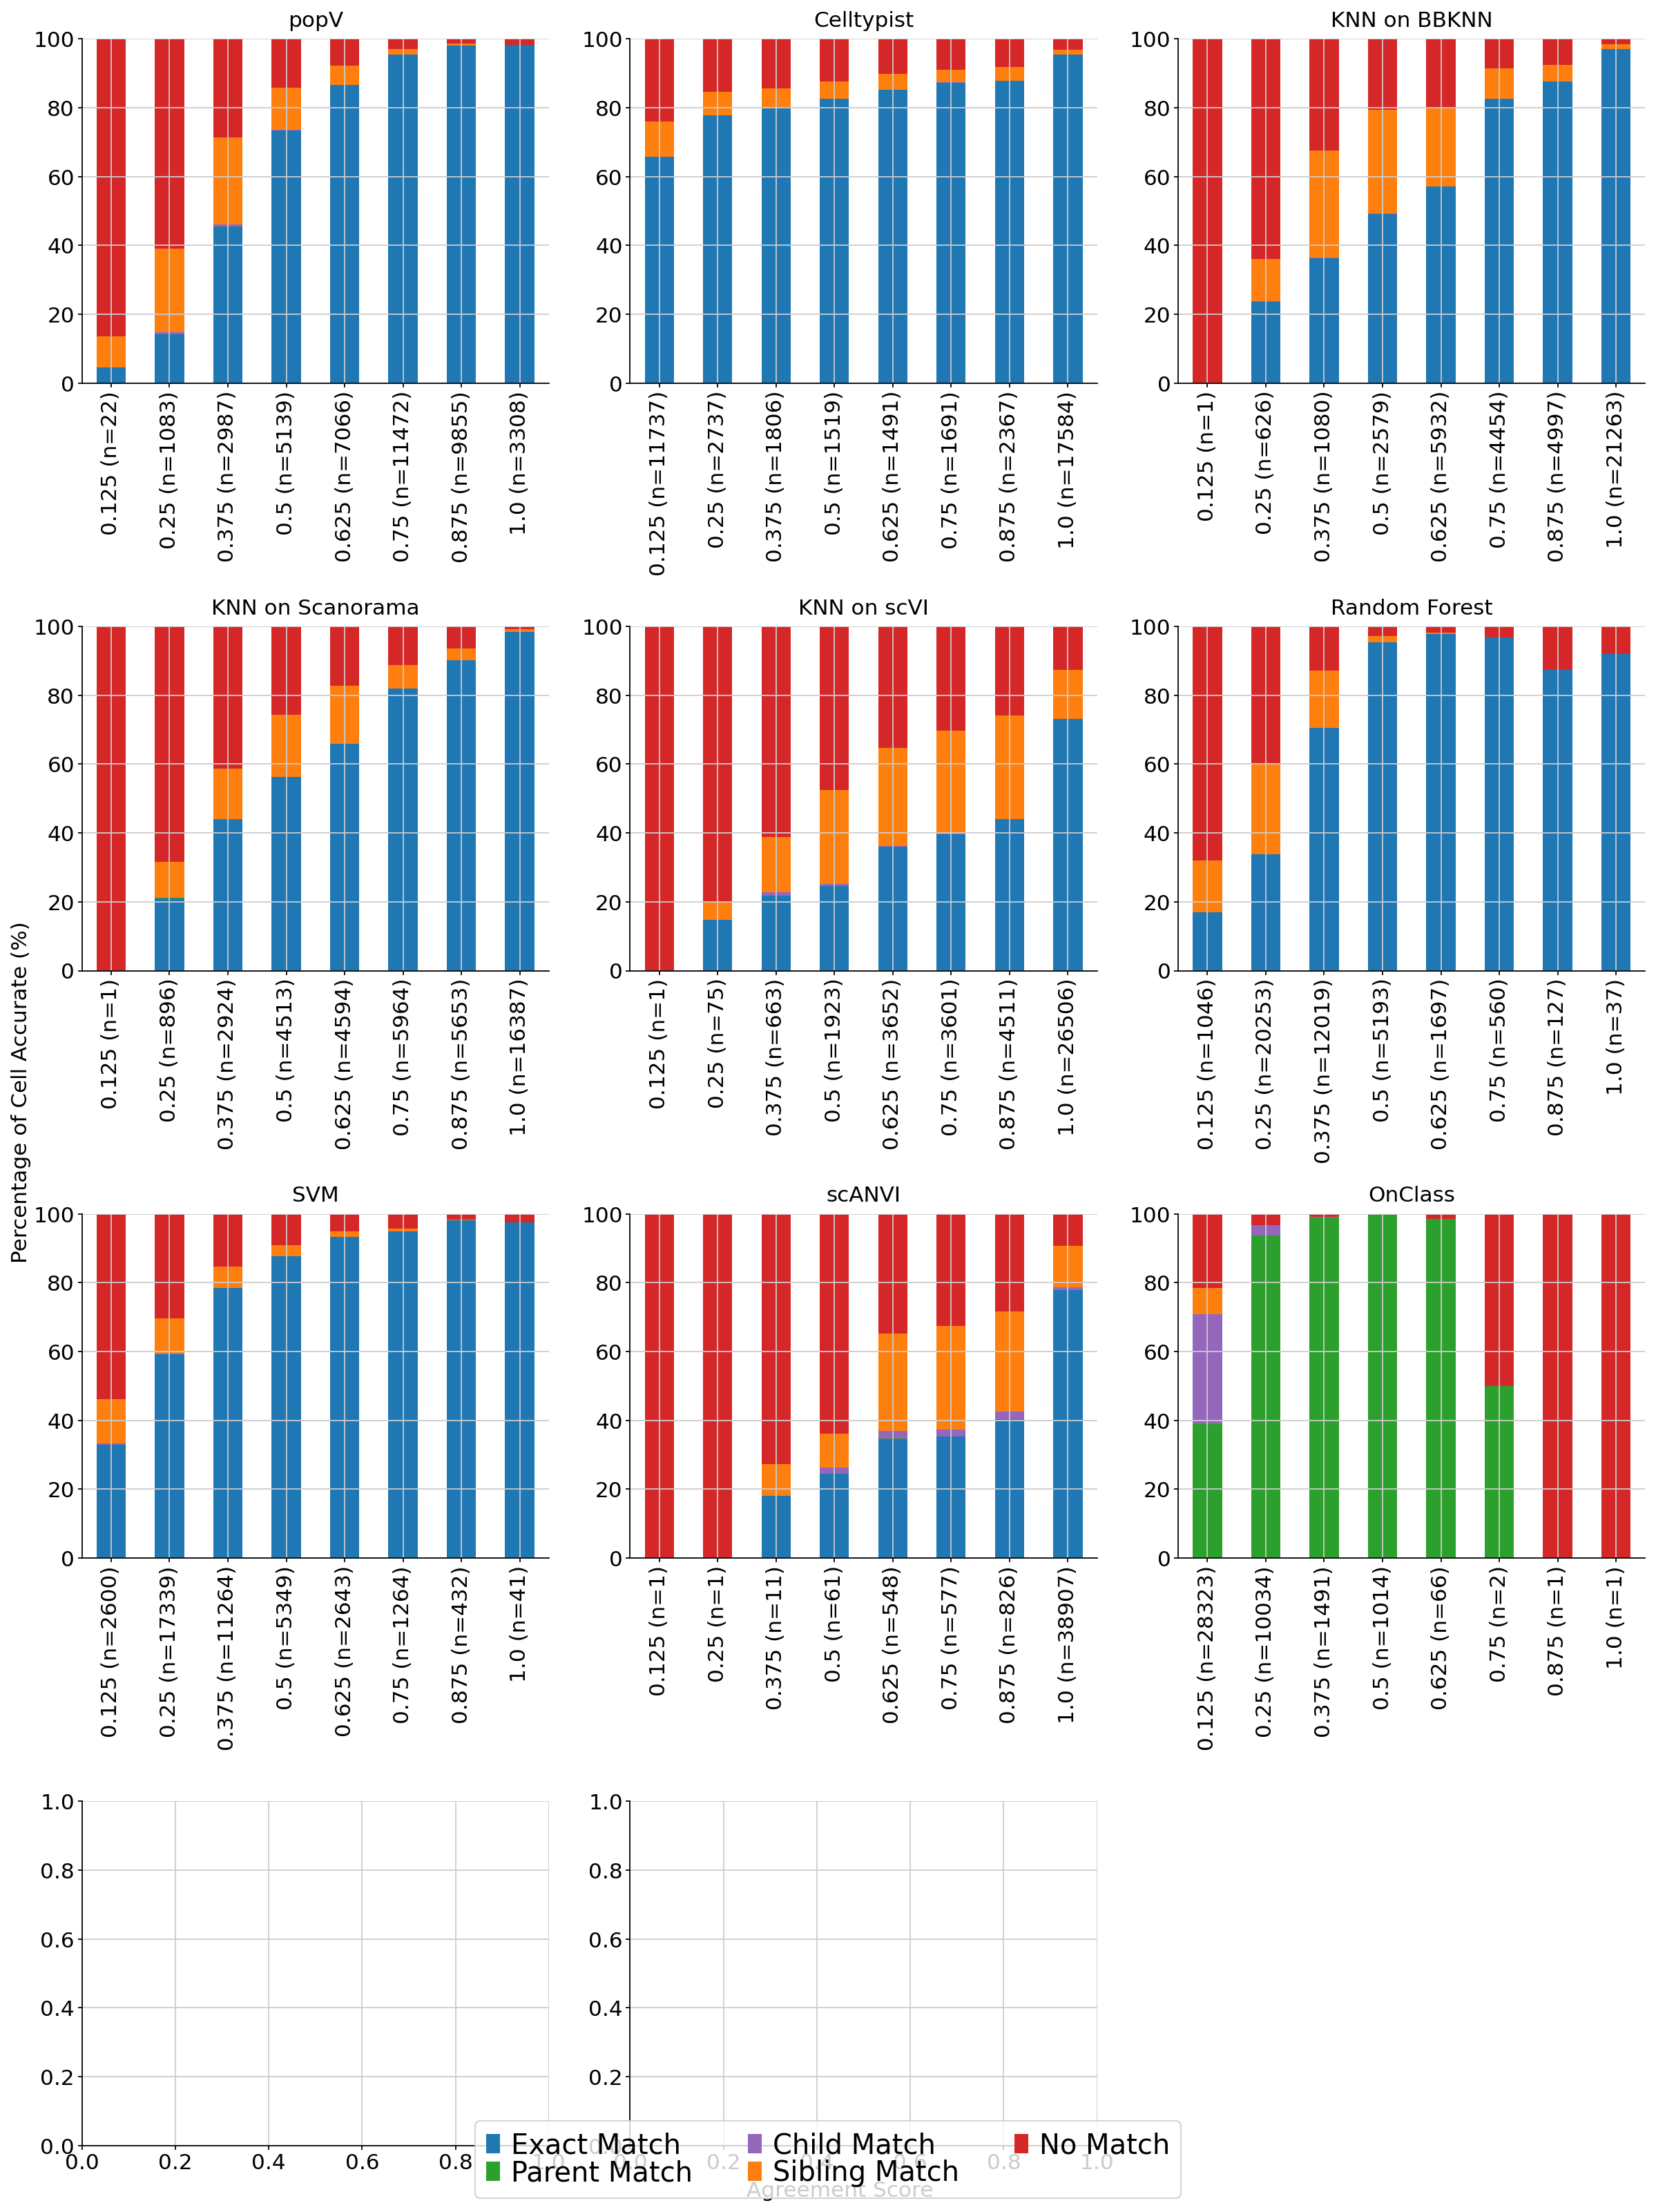

In [ ]:
scores = [1, 2, 3, 4, 5, 6, 7, 8]
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
idx = -1
for ontology_accuracy, prediction_key in acc_annotated_cols_dict.items():
    idx += 1
    exact_acc = []
    parent_acc = []
    child_acc = []
    sibling_acc = []
    neighborhood_acc = []
    ns = []
    for score in scores:
        df = query_adatas.obs[[prediction_key+'_probabilities', ontology_accuracy]]
        tmp = df[np.logical_and(df[prediction_key+'_probabilities']>(score-1)/np.max(scores), df[prediction_key+'_probabilities']<=score/np.max(scores))]
        n = tmp.shape[0] + 1
        
        ns.append(n)
        
        correct1 = tmp[tmp[ontology_accuracy] == exact].shape[0]
        exact_acc.append(correct1/n)
        
        correct2 = tmp[tmp[ontology_accuracy] == parent].shape[0]
        parent_acc.append(correct2/n)
        
        correct3 = tmp[tmp[ontology_accuracy] == child].shape[0]
        child_acc.append(correct3/n)
        
        correct4 = tmp[tmp[ontology_accuracy] == sibling].shape[0]
        sibling_acc.append(correct4/n)
        
        neighborhood_score = (correct1+correct2+correct3+correct4)/n
        neighborhood_acc.append(neighborhood_score)
    
    labels = [f'{s} (n={n})' for s,n in zip(scores/np.max(scores), ns)]
    df = pd.DataFrame(index = labels)
    df['Exact Match'] = exact_acc * np.array(ns) #/ np.sum(ns)
    df['Parent Match'] = parent_acc * np.array(ns) #/ np.sum(ns)
    df['Child Match'] = child_acc * np.array(ns) #/ np.sum(ns)
    df['Sibling Match'] = sibling_acc * np.array(ns) #/ np.sum(ns)
    df['No Match'] =  (np.array(ns) - df.sum(axis=1)) #/ np.sum(ns)
    df = 100 * df.div(df.sum(axis=1), axis=0)
    axs_ = axs[idx//3, idx%3]
    df.plot.bar(stacked=True, color=color_map, ax=axs_, legend=False)
    axs_.set_ylim(0, 100)
    
    axs_.set_title(rename_dict[prediction_key])

    #axs_.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=3)
    #plt.savefig(f'fig4/fig4_thymus_prediction_accuracy_{prediction_key}.pdf', bbox_inches='tight')
axs[-1, -1].axis('off')

handles, labels = axs_.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, labelspacing=0., prop={'size': 18})

fig.text(0.5, 0, 'Agreement Score', ha='center')
fig.text(0, 0.5, 'Percentage of Cell Accurate (%)', va='center', rotation='vertical')
fig.tight_layout()
plt.savefig(f'{output_folder}/nucleus_score_accuracy.pdf', bbox_inches='tight')
plt.show()


In [ ]:
df = query_adata.obs[acc_annotated_cols].apply(pd.Series.value_counts).T

In [ ]:
df = df / df.sum(1)[0]

In [ ]:
df.index = ['_'.join([i for i in s.split('_')[:-3] if i!='prediction']) for s in df.index]

In [ ]:
rename_dict = {
    'consensus': 'PopV',
    'popv_celltypist': 'Celltypist',
    'popv_knn_on_scanorama': 'Scanorama + KNN',
    'popv_knn_on_scvi': 'scVI + KNN',
    'popv_scanvi': 'scANVI',
    'popv_knn_on_bbknn': 'BBKNN + KNN',
    'popv_rf': 'Random Forest',
    'seurat': 'Seurat',
    'popv_onclass': 'OnClass',
    'popv_onclass_seen': 'OnClass_seen',
    'popv_svm': 'SVM'}

In [ ]:
df = df.rename(index=rename_dict)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 44 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'F', 'I', 'K', 'M', 'N', 'O', 'P', 'R', 'S', 'V', 'a', 'b', 'c', 'd', 'e', 'eight', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'plus', 'r', 's', 'six', 'space', 't', 'two', 'u', 'x', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 14, 17, 19, 20, 21, 23, 25, 27, 36, 37, 38, 41, 44, 46, 48, 49, 50, 51, 53, 54, 57, 68, 69, 70, 71, 72, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 91, 92]
Closed glyph list over 'GSUB': 44 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'F', 'I', 'K', 'M', 'N', 'O', 'P', 'R', 'S', 'V', 'a', 'b', 'c', 'd', 'e', 'eight', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'plus', 'r', 's', 'six', 'space', 't', 'two', 'u', 'x', 'y',

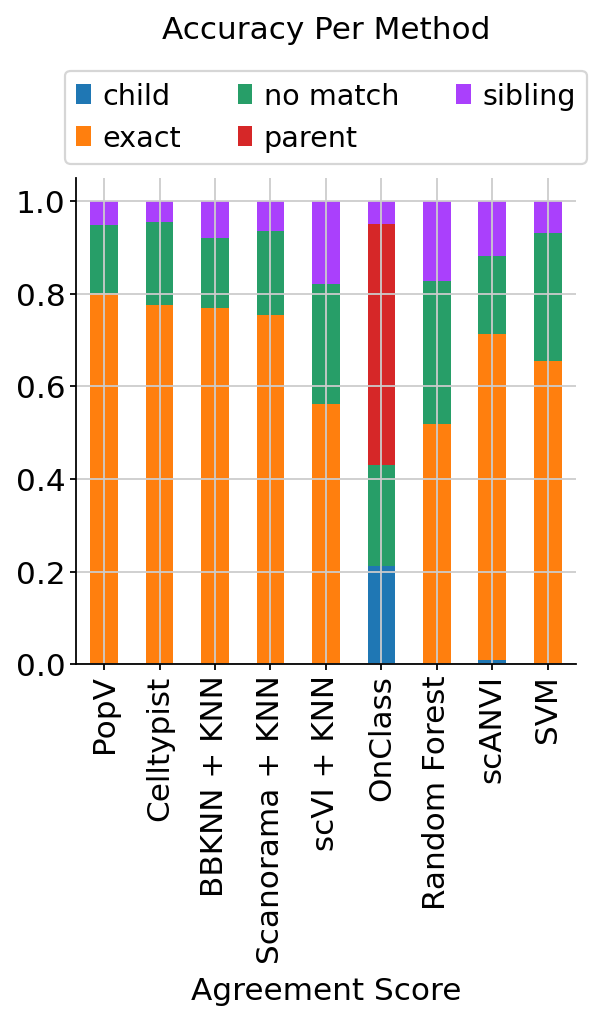

In [ ]:
ax = df.plot.bar(stacked=True)

ax.set_xlabel('Agreement Score')
ax.set_title('Accuracy Per Method', y=1.25)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),ncol=3)

plt.savefig(f'{output_folder}/popv_accuracy_per_method.pdf', bbox_inches='tight')


In [ ]:
from sklearn.metrics import f1_score

y_true = query_adata.obs['harmonized_celltype']
f1_df = pd.DataFrame(columns = ['macro', "micro", "weighted"])
pred_keys = list(query_adata.uns['prediction_keys']) + ['popv_prediction']

for key in pred_keys:
    y_pred = list(query_adata.obs[key])
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    f1_df.loc[key] = [f1_macro, f1_micro,f1_weighted]

f1_df.sort_values(by='weighted', ascending=False)

macro     micro  weighted
popv_prediction                   0.467099  0.801336  0.824071
popv_celltypist_prediction        0.574681  0.776168  0.798371
popv_knn_on_bbknn_prediction      0.460872  0.769603  0.791144
popv_scanvi_prediction            0.419388  0.705592  0.763090
popv_knn_on_scanorama_prediction  0.332102  0.753180  0.743814
popv_svm_prediction               0.332308  0.653371  0.700667
popv_rf_prediction                0.333694  0.517536  0.571696
popv_knn_on_scvi_prediction       0.272383  0.561444  0.533039
popv_onclass_prediction           0.000000  0.000000  0.000000

In [ ]:
f1_df.to_csv(f'{output_folder}/f1_scores.csv')

In [ ]:
df

Exact Match  Parent Match  Child Match  Sibling Match  \
PopV                0.801336      0.000000     0.000818       0.051994   
Celltypist          0.776168      0.000000     0.000182       0.045998   
BBKNN + KNN         0.769603      0.000000     0.000432       0.078684   
Scanorama + KNN     0.753180      0.000068     0.000023       0.064578   
scANVI              0.705592      0.000045     0.008382       0.119140   
SVM                 0.653371      0.000091     0.001454       0.069394   
scVI + KNN          0.561444      0.000000     0.000931       0.179516   
Random Forest       0.517536      0.000000     0.000568       0.173269   
OnClass             0.000000      0.522056     0.212430       0.048542   

                 No Match  
PopV             0.145852  
Celltypist       0.177653  
BBKNN + KNN      0.151281  
Scanorama + KNN  0.182151  
scANVI           0.166841  
SVM              0.275691  
scVI + KNN       0.258109  
Random Forest    0.308627  
OnClass          0.216973

In [11]:
query_adata

View of AnnData object with n_obs × n_vars = 46500 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'suspension_type', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2',

In [25]:
from popv import _utils

In [32]:
import itertools
import seaborn as sns
from sklearn.metrics import average_precision_score, f1_score
from sklearn.preprocessing import label_binarize

In [34]:
prediction_keys = ['popv_celltypist_prediction', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_scanorama_prediction',
                   'popv_knn_on_scvi_prediction', 'popv_rf_prediction', 'popv_svm_prediction', 'popv_scanvi_prediction'
                   ] # onclass
sub_prediction_list = list(itertools.combinations(prediction_keys, 5))

In [54]:
accuracy_results = {}
precision_results = {}

for sub_prediction_key in sub_prediction_list:
    # Generate sub-predictions by applying majority_vote to each combination
    sub_prediction = query_adata.obs[list(sub_prediction_key)].apply(_utils.majority_vote, axis=1)
    sub_prediction_score = query_adata.obs[list(sub_prediction_key)].apply(_utils.majority_count, axis=1)
    
    # Calculate accuracy
    # Binarize sub_predictions
    precision = average_precision_score(query_adata.obs['harmonized_celltype'].astype(str)==sub_prediction, sub_prediction_score, average='weighted')
    accuracy = f1_score(query_adata.obs['harmonized_celltype'], sub_prediction, average='weighted')
    
    entry = tuple([i for i in prediction_keys if i not in sub_prediction_key])
    
    # Store the accuracy
    precision_results[entry] = precision
    accuracy_results[entry] = accuracy

# Convert accuracy results to a format suitable for heatmap plotting
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Combination', 'Accuracy'])
accuracy_df[['Key1', 'Key2']] = pd.DataFrame(accuracy_df['Combination'].tolist(), index=accuracy_df.index)
accuracy_df = accuracy_df.pivot("Key1", "Key2", "Accuracy")

# Convert accuracy results to a format suitable for heatmap plotting
precision_df = pd.DataFrame(list(precision_results.items()), columns=['Combination', 'Accuracy'])
precision_df[['Key1', 'Key2']] = pd.DataFrame(precision_df['Combination'].tolist(), index=precision_df.index)
precision_df = precision_df.pivot("Key1", "Key2", "Accuracy")

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 43 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'F', 'O', 'P', 'S', 'a', 'b', 'c', 'colon', 'd', 'e', 'f', 'five', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'underscore', 'v', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 24, 25, 26, 29, 36, 41, 50, 51, 54, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92, 3228]
Closed glyph list over 'GSUB': 48 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'F', 'O', 'P', 'S', 'a', 'b', 'c', 'colon', 'd', 'e', 'f', 'fi', 'five', 'fl', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r'

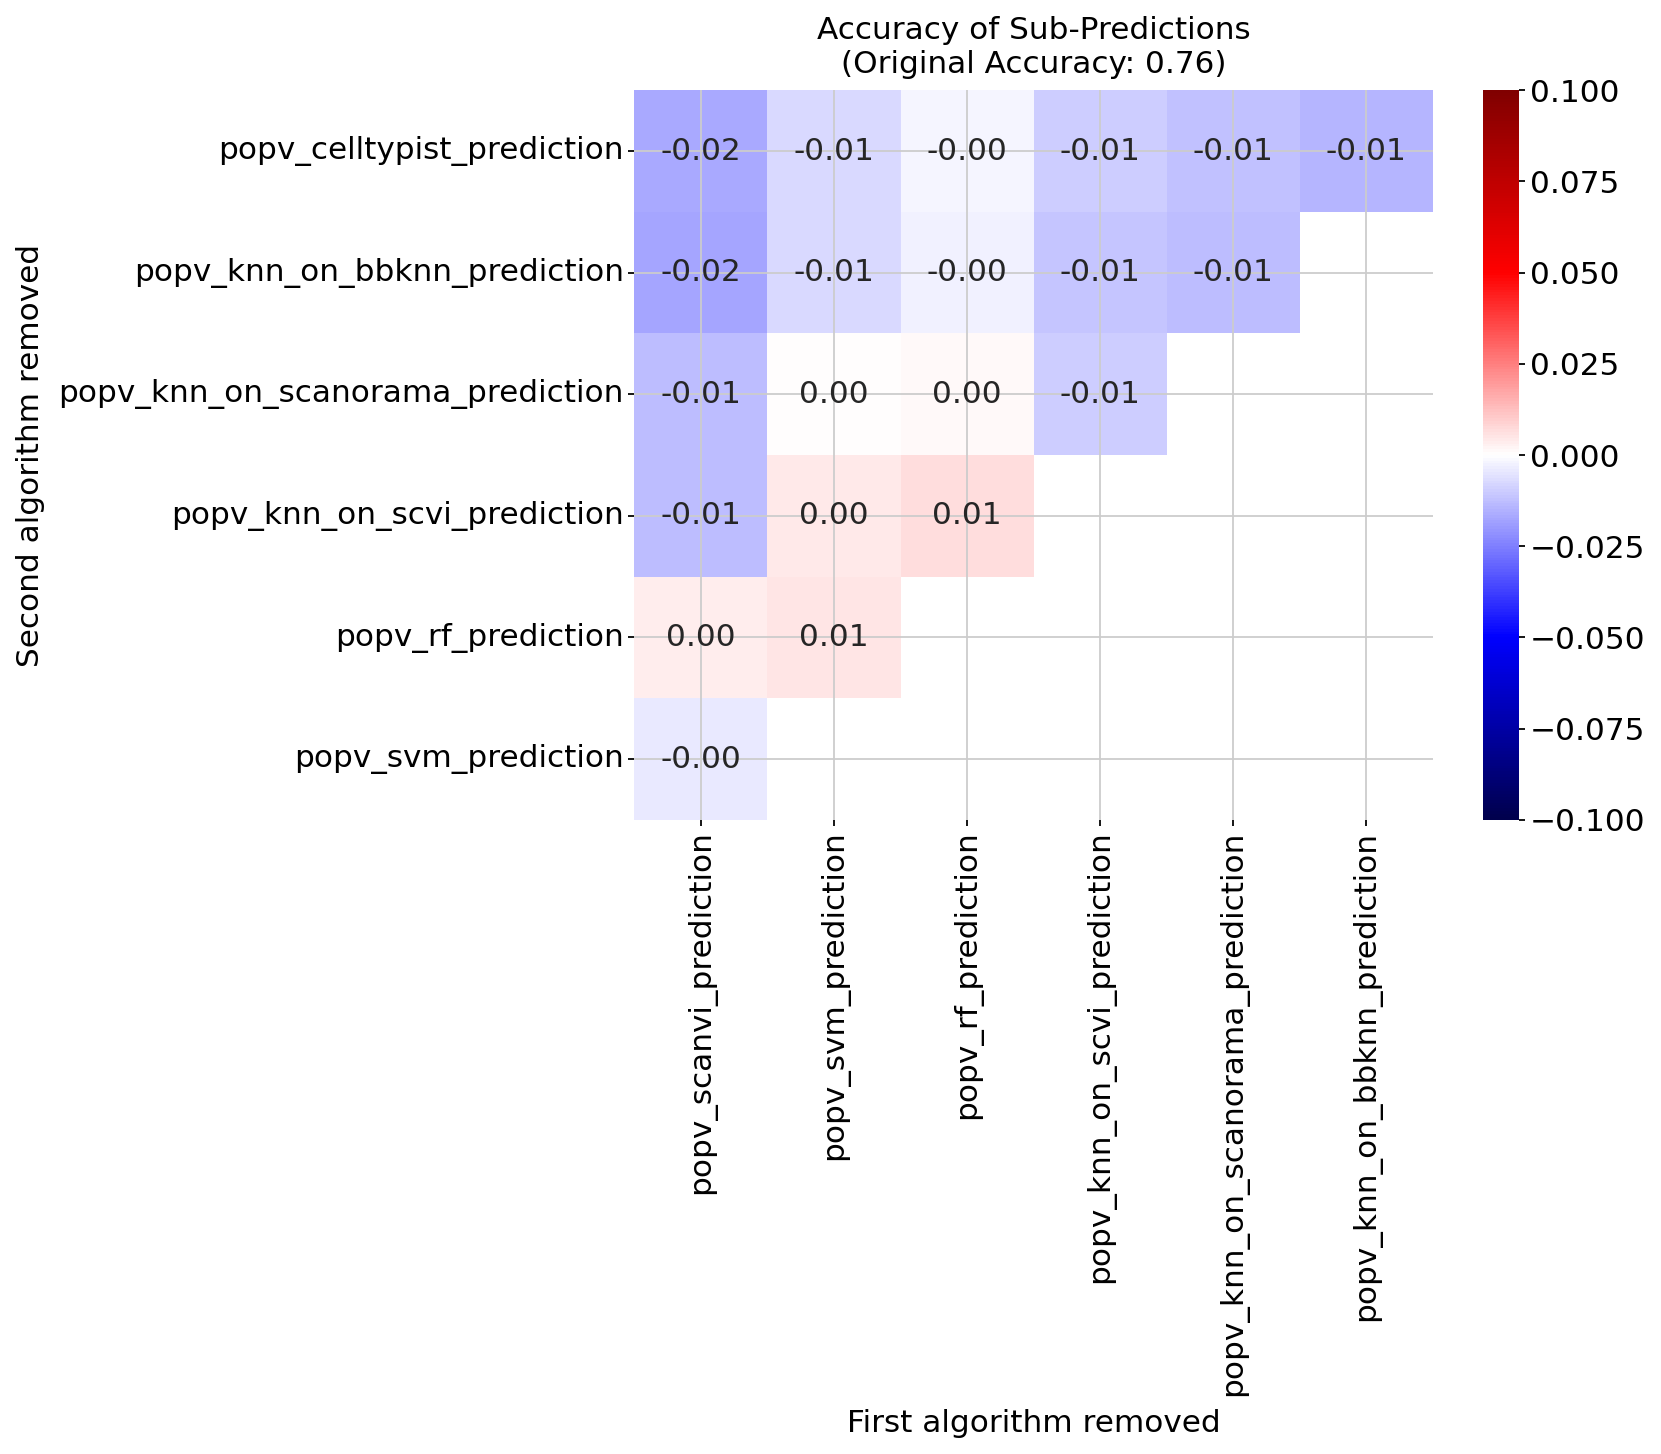

In [59]:
accuracy_df = accuracy_df.iloc[accuracy_df.isnull().sum(axis=1).mul(-1).argsort()[::-1], accuracy_df.isnull().sum(axis=0).mul(-1).argsort()[::-1]]
original_accuracy = f1_score(query_adata.obs['harmonized_celltype'], query_adata.obs['popv_prediction'], average='weighted')
loss_accuracy_df = accuracy_df - original_accuracy
plt.figure(figsize=(8, 6))
sns.heatmap(loss_accuracy_df, annot=True, cmap="seismic", fmt=".2f", vmin=-0.1, vmax=0.1)
plt.title(f'Accuracy of Sub-Predictions\n(Original Accuracy: {original_accuracy:.2f})')
plt.xlabel('First algorithm removed')
plt.ylabel('Second algorithm removed')
plt.savefig(f'{output_folder}/sub_prediction_accuracy.pdf', bbox_inches='tight')
plt.show()

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 43 glyphs before
Glyph names: ['.notdef', '.null', 'F', 'O', 'P', 'S', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'v', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 32, 41, 50, 51, 54, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92, 3228]
Closed glyph list over 'GSUB': 48 glyphs after
Glyph names: ['.notdef', '.null', 'F', 'O', 'P', 'S', 'a', 'b', 'c', 'd', 'e', 'eight', 'equal', 'f', 'fi', 'five', 'fl', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six'

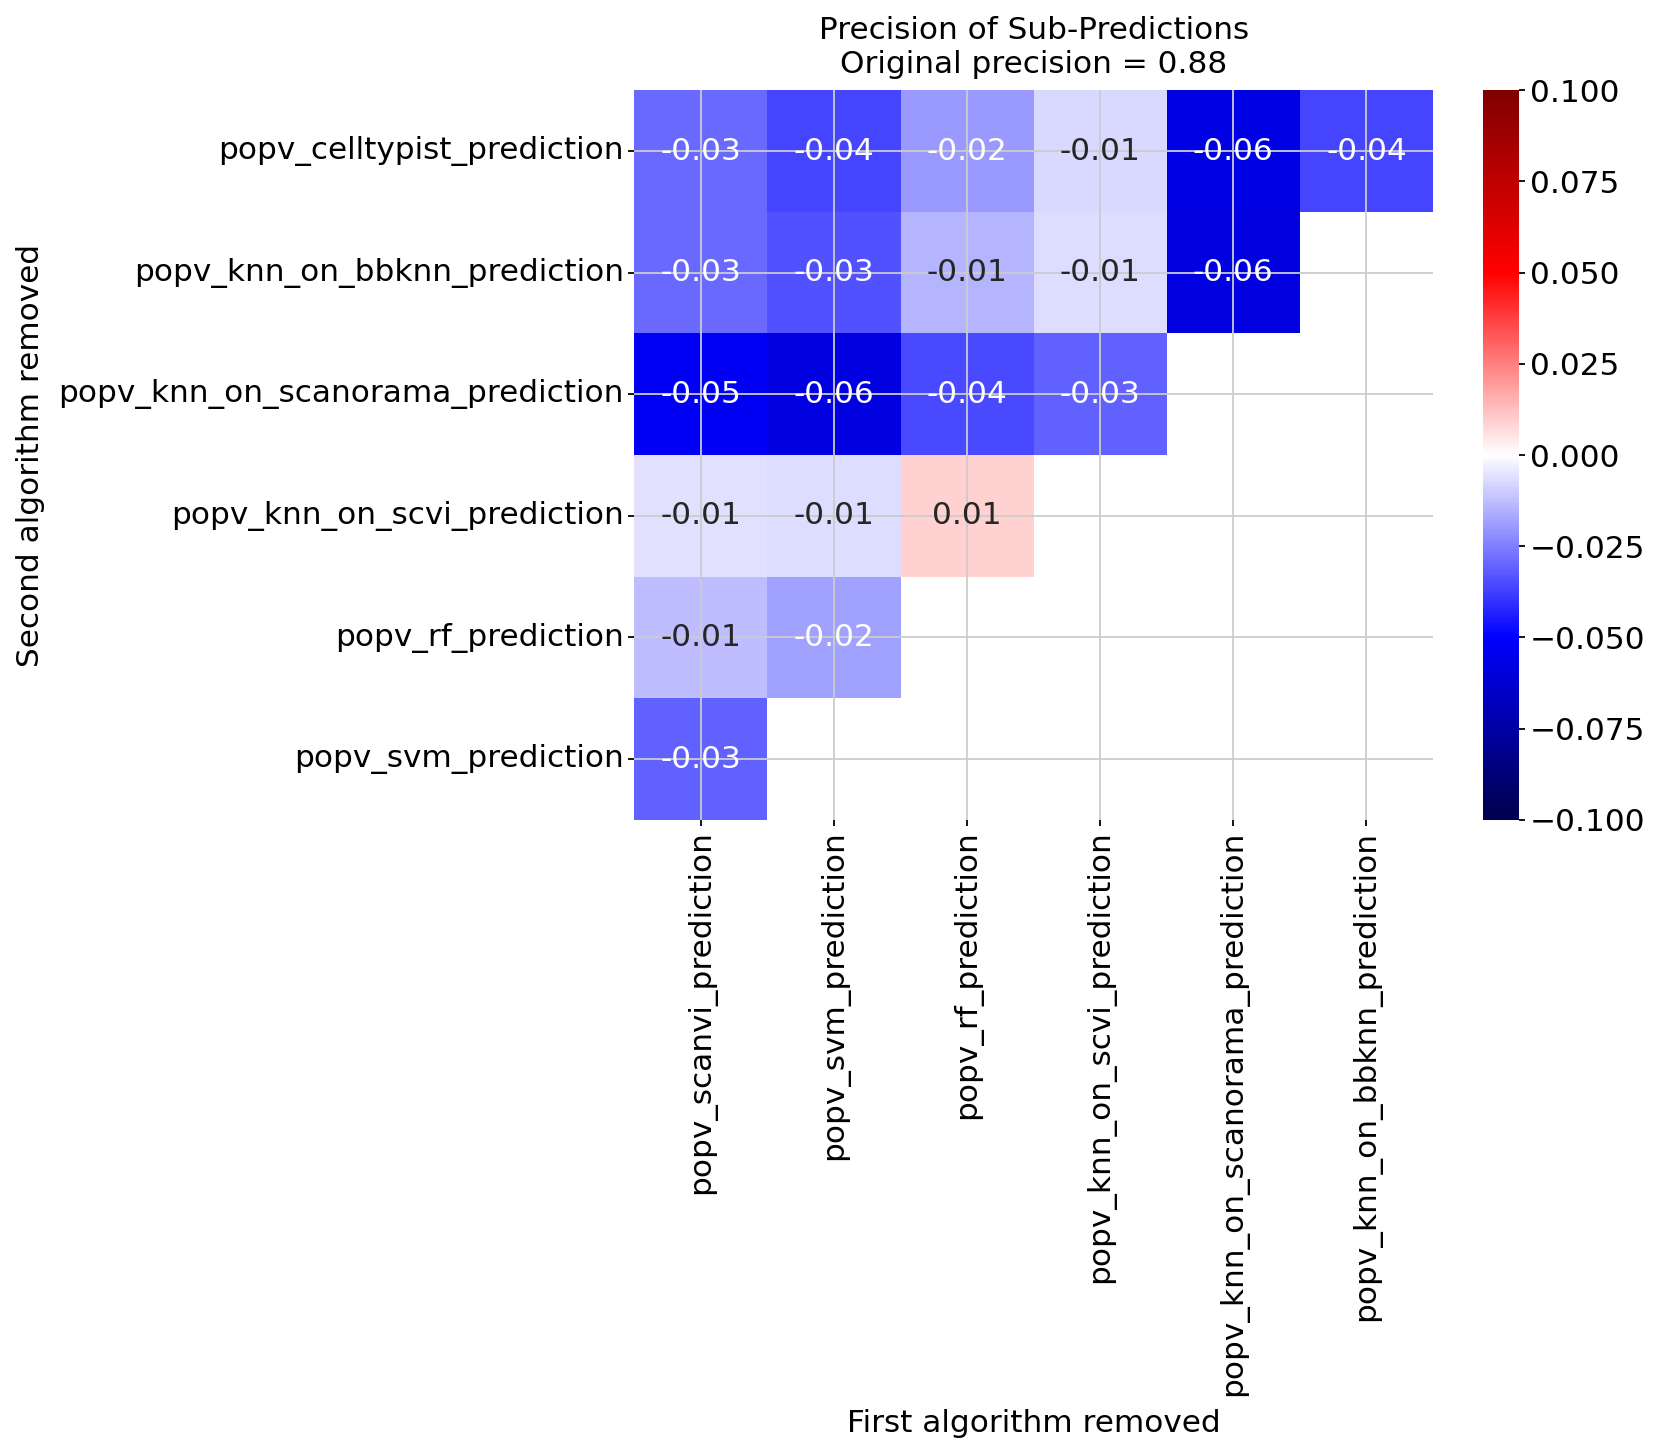

In [60]:
precision_df = precision_df.iloc[precision_df.isnull().sum(axis=1).mul(-1).argsort()[::-1], precision_df.isnull().sum(axis=0).mul(-1).argsort()[::-1]]
original_precision = average_precision_score(query_adata.obs['harmonized_celltype'].astype(str)==query_adata.obs['popv_prediction'], query_adata.obs['popv_prediction_score'], average='weighted')
loss_precision_df = precision_df - original_precision

plt.figure(figsize=(8, 6))
sns.heatmap(loss_precision_df, annot=True, cmap="seismic", fmt=".2f", vmin=-0.1, vmax=0.1)
plt.title(f'Precision of Sub-Predictions\nOriginal precision = {original_precision:.2f}')
plt.xlabel('First algorithm removed')
plt.ylabel('Second algorithm removed')
plt.savefig(f'{output_folder}/sub_prediction_precision.pdf', bbox_inches='tight')
plt.show()